<a href="https://colab.research.google.com/github/claudia-miranda/random_dimer_covering_on_the_AZ/blob/main/aztec_diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from math import *
from tqdm import tqdm
import os as os
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/drive')

# Building different graphs

This function constructs a weighted **complete bipartite graph**


In [ ]:
# COMPLETE BIPARTITE

def bipartite_complete(N, plot):

  G = nx.complete_bipartite_graph(N, N)  # creates complete bipartite graph

  color_list = list([])

  # random_weights = np.random.uniform(0,1, nx.number_of_edges(G))
  random_weights = np.random.exponential(1, nx.number_of_edges(G))

  for i,e in enumerate(G.edges()):
    G[e[0]][e[1]]['weight'] = random_weights[i]

  weights = nx.get_edge_attributes(G, 'weight')

  for node in list(G.nodes(data=True)):
    if node[1]['bipartite']==0:
      color_list.append('red')
    if node[1]['bipartite']==1:
      color_list.append('blue')

    # for i,(u,v) in enumerate(G.edges()):
    #   list(G.edges)[i]['weight'] = random.uniform(0,1)

    # nx.set_edge_attributes(G, values=np.random.uniform(0,1, nx.number_of_edges(G)), name='weight')
  red, blue = nx.bipartite.sets(G)

  if plot == True:
    pos1 = nx.bipartite_layout(G, red)
    plt.figure(1, figsize=(5,5))
    plt.margins(0.5)
    nx.draw(G, pos=pos1, with_labels=True, node_color=color_list, node_size=1200)
  # print(weights)
  # nx.draw_networkx_edge_labels(G,pos=pos1,edge_labels=weight)
    plt.show()

  return G, red, blue, weights


This function constructs a weighted **bipartite grid of n x n nodes**

In [ ]:
# BIPARTITE GRID

def bipartite_grid_graph(n, plot):

  B = nx.grid_2d_graph(n,n)

  matrix_nodes = np.zeros((n,n), dtype='i,i')

  for k in range(0,n):
    matrix_nodes[k,:] = list(B.nodes)[k*n:(k+1)*(n)]

  bip_1 = []
  bip_2 = []

  for i in range(0,n):
    if i == 0:
      bip_1 = matrix_nodes[i,:][::2]
      bip_2 = matrix_nodes[i,1:][::2]
    else:
      if i%2 == 0:
        bip_1 = np.hstack([bip_1,matrix_nodes[i,:][::2]])
        bip_2 = np.hstack([bip_2, matrix_nodes[i,1:][::2]])
      else:
        bip_1 = np.hstack([bip_1,matrix_nodes[i,1:][::2]])
        bip_2 = np.hstack([bip_2, matrix_nodes[i,:][::2]])

  bip_1 = [tuple(elem) for elem in bip_1]
  bip_2 = [tuple(elem) for elem in bip_2]

  for elem in bip_1:
    B.add_node(elem, bipartite=0)

  for elem in bip_2:
    B.add_node(elem, bipartite=1)

  # list with colours depending if bipartite = 0 or 1
  color_list = list([])

  # weights
  # random_weights = np.random.uniform(0,1, nx.number_of_edges(B))
  random_weights = np.random.exponential(1, nx.number_of_edges(B))

  # bipartite sets
  red, blue = nx.bipartite.sets(B)

  for i,e in enumerate(B.edges()):
    B[e[0]][e[1]]['weight'] = random_weights[i]

  weights = nx.get_edge_attributes(B, 'weight')

  if plot == True:
    for node in list(B.nodes(data=True)):
      if node[1]['bipartite']==0:
        color_list.append('red')
      if node[1]['bipartite']==1:
        color_list.append('blue')

    pos1 = {(x,y):(y,-x) for x,y in B.nodes()}
    plt.figure(1, figsize=(7.5,7.5))
    nx.draw(B, pos=pos1, with_labels=True, node_color=color_list, node_size=1200)
    plt.show()

  return B, red, blue, weights

This function constructs a weighted **bipartite aztec graph of order n**

In [ ]:
# AZTEC GRAPH (order n)

def aztec_graph(n, plot):
  N = 2*n
  B = nx.grid_2d_graph(N,N)

  matrix_nodes = np.zeros((N,N), dtype='i,i')

  for k in range(0,N):
    matrix_nodes[k,:] = list(B.nodes)[k*N:(k+1)*(N)]

  bip_1 = []
  bip_2 = []

  for i in range(0,N):
    if i == 0:
      bip_1 = matrix_nodes[i,:][::2]
      bip_2 = matrix_nodes[i,1:][::2]
    else:
      if i%2 == 0:
        bip_1 = np.hstack([bip_1,matrix_nodes[i,:][::2]])
        bip_2 = np.hstack([bip_2, matrix_nodes[i,1:][::2]])
      else:
        bip_1 = np.hstack([bip_1,matrix_nodes[i,1:][::2]])
        bip_2 = np.hstack([bip_2, matrix_nodes[i,:][::2]])

  bip_1 = [tuple(elem) for elem in bip_1]
  bip_2 = [tuple(elem) for elem in bip_2]

  for elem in bip_1:
    B.add_node(elem, bipartite=0)

  for elem in bip_2:
    B.add_node(elem, bipartite=1)


  # weights
  random_weights = np.random.exponential(1, nx.number_of_edges(B))

  # bipartite sets
  red, blue = nx.bipartite.sets(B)

  for i,e in enumerate(B.edges()):
    B[e[0]][e[1]]['weight'] = random_weights[i]

  list_remove = []
  for i in range(0,N):
    for j in range(0,N):
      if i < n:
        if j < n - (i+1) or j > n + i:
          list_remove.append((i,j))
      else:
        if j < n-(N-i) or j > n+N-(i+1):
          list_remove.append((i,j))
  B.remove_nodes_from(list_remove)
  weights = nx.get_edge_attributes(B, 'weight')

  # list with colours depending if bipartite = 0 or 1
  color_list = list([])

  for node in list(B.nodes(data=True)):
    if node[1]['bipartite']==0:
      color_list.append('red')
    if node[1]['bipartite']==1:
      color_list.append('blue')

  # bipartite sets
  red, blue = nx.bipartite.sets(B)

  if plot == True:
    # plt.figure(1,figsize=(100,100), dpi=300)
    pos1 = {(x,y):(y,-x) for x,y in B.nodes()}
    plt.figure(1, figsize=(10,10))
    nx.draw(B, pos=pos1, with_labels=False, node_color=color_list, node_size=500)
    plt.show()

  return B, red, blue, weights

Plotting examples of **complete** bipartite graph, bipartite **grid** graph and bipartite **aztec** graph.

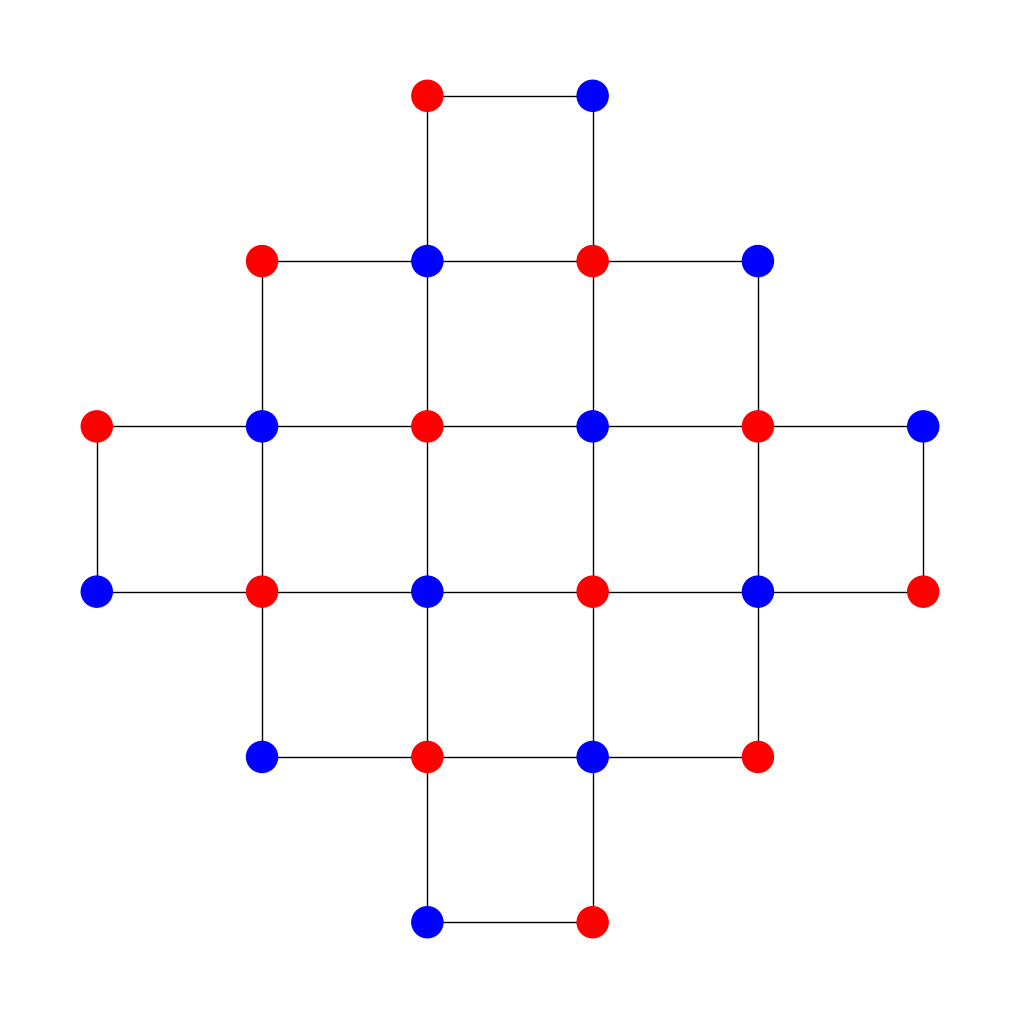

In [ ]:
# C, red, blue, weights = bipartite_complete(3, True)

# G, red, blue, weights = bipartite_grid_graph(6, True)

A, red, blue, weights = aztec_graph(3, True)


# Optimal matching using Networkx

**Optimal matching** (using Networkx) and cost

In [ ]:
def bipartite_min_matching(G):

  minmatch = nx.bipartite.minimum_weight_full_matching(G, weight="weight")
  list_minmatch = list(minmatch)
  N = int(len(list_minmatch))

  cost = 0

  min_edges = []

  for i in range(N):
      node_1 = list_minmatch[i]
      node_2 = minmatch[node_1]
      if (node_2, node_1) in list(G.edges):
        cost += nx.get_edge_attributes(G, 'weight')[(node_2, node_1)]
        min_edges.append((node_2, node_1))

  # print('The cost of the pairing is {}'.format(cost))

  return G, minmatch, cost, min_edges

**Plotting the optimal matching**

In [ ]:
def plot_matching(B, min_edges, complete):
    # list with colours depending if bipartite = 0 or 1
    color_list = list([])

    for node in list(B.nodes(data=True)):
      if node[1]['bipartite']==0:
       color_list.append('red')
      if node[1]['bipartite']==1:
       color_list.append('blue')

    if complete == True:
      red, blue = nx.bipartite.sets(B)
      pos1 = nx.bipartite_layout(B, red)
      figsize=(5,5)
      plt.margins(0.5)
    else:
      pos1 = {(x,y):(y,-x) for x,y in B.nodes()}
      figsize=(10,10)


    plt.figure(1, figsize)
    nx.draw(B, pos=pos1, with_labels=True, node_color=color_list, node_size=500, edge_color='#d3d3d3')
    nx.draw_networkx_edges(B, pos=pos1, edgelist=min_edges, edge_color='g', width=4)
    plt.show()

Example of optimal matching and plotting

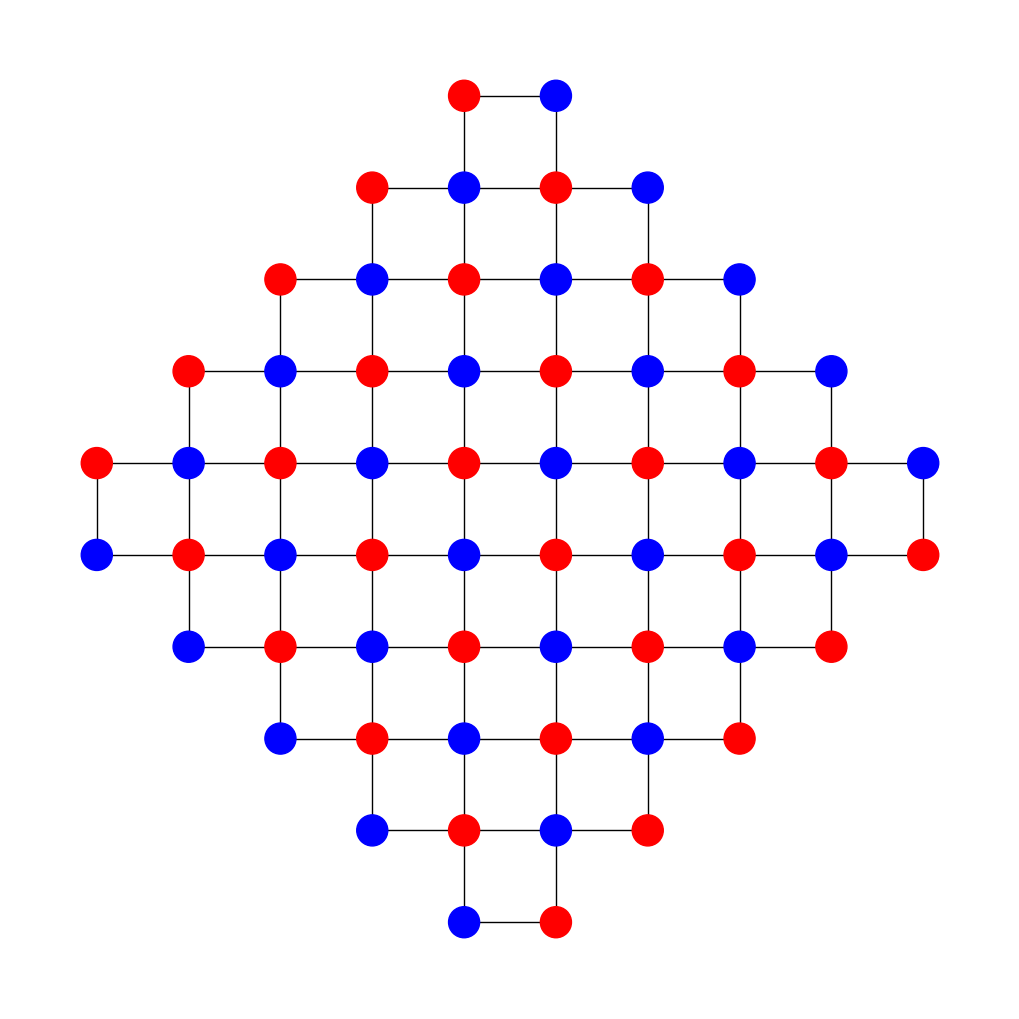

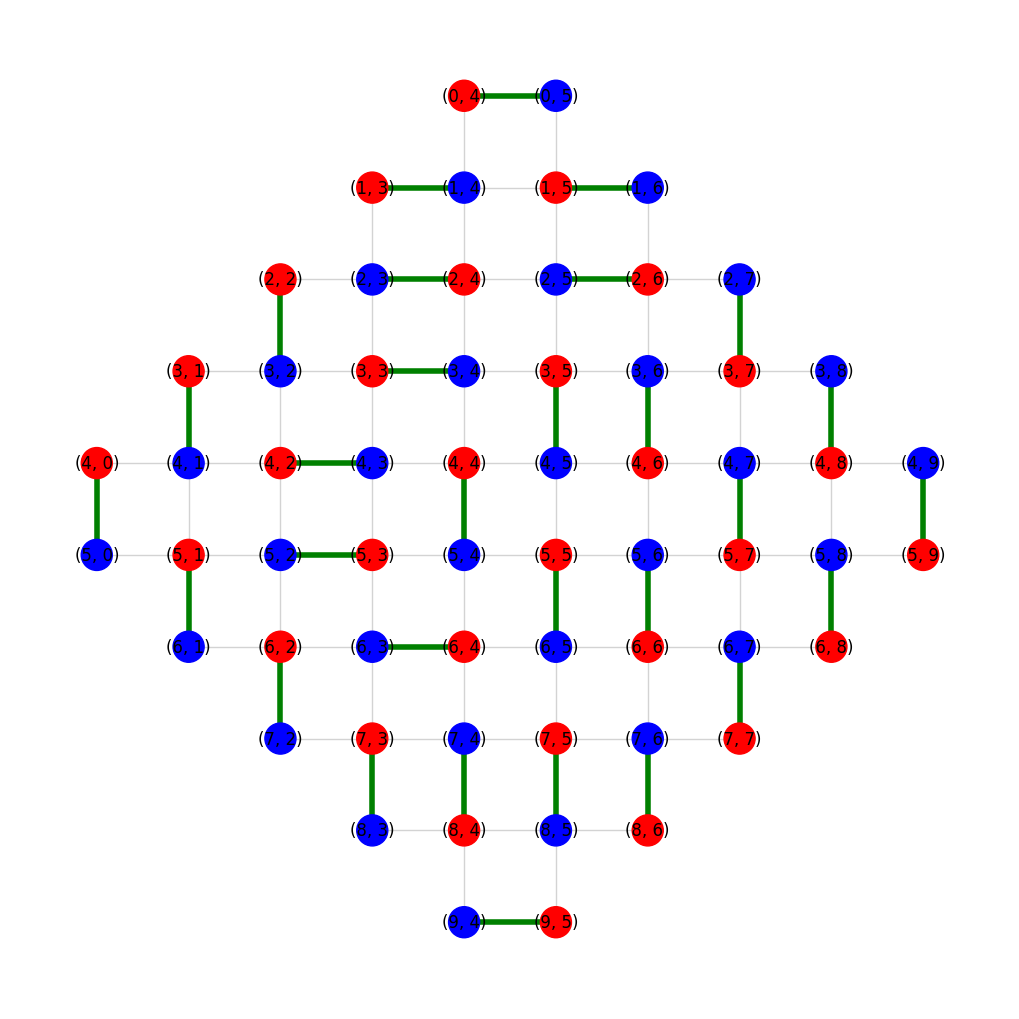

The cost of the pairing is 20.30242091919434


In [ ]:
# C, red, blue, weights = bipartite_complete(4, False)
# A, red, blue, weights = aztec_graph(5, False)

A, red, blue, weights = aztec_graph(5, True)
A, minmatch, cost, min_edges = bipartite_min_matching(A)
plot_matching(A, min_edges, complete=False)
print('The cost of the pairing is {}'.format(cost))


# C, minmatch, cost, min_edges = bipartite_min_matching(C)
# plot_matching(C, min_edges, complete=True)
# print('The cost of the pairing is {}'.format(cost))

Function to **change the weighting** of a graph without altering its topology

In [ ]:
def reweigh_graph(G):
  for e in G.edges.data():
    e[2]['weight']=np.random.exponential(1)

  weights = nx.get_edge_attributes(G, 'weight')
  return G, weights

**Average optimal cost (AOC) over N iterations**

In [ ]:
def AOC(G, iterations, complete):

  cost = 0
  cost2 = 0

  for s in range(iterations):
    onecost=0
    G, weights = reweight_graph(G)
    G, minmatch, onecost, min_edges = bipartite_min_matching(G)

    cost  += onecost
    cost2 += onecost**2

  cost = cost/iterations
  cost2 = cost2/iterations
  error = np.sqrt((cost2-cost**2)/iterations)

  print('The cost of the pairing is {} pm {}'.format(cost,error))

  costth=0
  if complete == True:
    #Let us compare with Parisi's theoretical formula
    red, blue = nx.bipartite.sets(G)
    N = len(list(red))
    # print(N)
    for i in range(N):
      costth+= 1./(i+1.)**2
    print('The theoretical prediction is {}'.format(costth))

  return cost, cost2, error, costth

In [ ]:
# cost, cost2, error, costth = AOC(A, 100, False)
# cost, cost2, error, costth = AOC(C, 100, True)

# Optimal matching using BP

**Optimal cost using Belief propagation**

In [ ]:
#Single BP iteration
def update(G, T):
  listEdges=list(G.edges())
  listNodes=list(G.nodes())
  random.shuffle(listEdges)
  match={}
  F1 = 0 # first term in Bethe entropy
  F2 = 0 # second term in Bethe entropy
  beta = 1./T if T>0 else 0
  cost = 0

  for e in listEdges:
    u, v = e[0], e[1]
    if G.nodes[u]['bipartite'] == 0 or G.nodes[v]['bipartite'] == 1:
      coloru, colorv = 'red','blue'
    else:
      colorv, coloru = 'red', 'blue'
    uv, vu = [], []
    for i in G[u]:
      if i!=v:
        uv.append(G[i][u]['weight']-G[i][u][colorv])
    for i in G[v]:
      if i!=u:
        vu.append(G[i][v]['weight']-G[i][v][coloru])
    G[u][v][coloru]=min(uv)
    G[v][u][colorv]=min(vu)
    G[u][v]['marginal'] = 0
    phi = G[u][v]['weight'] - G[u][v][coloru] - G[v][u][colorv]
    if (phi<0):
      F2 += phi
      match[u] = v
      match[v] = u
      G[u][v]['marginal'] = 1.
      cost += G[u][v]['weight']

    if T>0:
      G[u][v][coloru] += -np.log(np.exp(-beta*(uv-np.min(uv))).sum())/beta
      G[v][u][colorv] += -np.log(np.exp(-beta*(vu-np.min(vu))).sum())/beta
      F2 += -np.log(1+np.exp(-beta*np.abs(phi)))/beta
      if phi>0:
        norm = 1 + np.exp(-beta*phi)
        G[u][v]['marginal'] = np.exp(-beta*phi)/norm
      else:
        norm = 1 + np.exp(beta*phi)
        G[u][v]['marginal'] = 1/norm

  for i in listNodes:
    list_neigh = list(G.neighbors(i))
    colorj = 'blue' if G.nodes[i]['bipartite'] == 0 else 'red'
    neigh = []
    for j in list_neigh:
      neigh.append(G[j][i]['weight']-G[j][i][colorj] )
    F1 += np.min(neigh)
    if T>0:
      F1 += -np.log(np.exp(-beta*(neigh-np.min(neigh))).sum())/beta
  bethe = F1-F2
  return G, match, cost, bethe

In [ ]:
# BP algorithm

def belief_propagation(G, T):

  #Add the fields on the edge of the graph
  # # Two fields 'red' (red -> blue) and blue (blue -> red) for each edge
  # nx.set_edge_attributes(G, 0, 'red')
  # nx.set_edge_attributes(G, 0, 'blue')

  for e in list(G.edges()):
    u, v = e[0], e[1]
    G[u][v]['red']=np.random.randn()
    G[u][v]['blue']=np.random.randn()

  bethebp = 1
  matchbp = {}
  costold = 0
  betheold = 1
  itera = 0
  nnodes = G.number_of_nodes()
  convergence = True

  while True:
    # print(itera)
    betheold = bethebp
    # print(bethebp)
    G, matchbp, costbp, bethebp = update(G,T)
    bethebp = bethebp*2./nnodes  # divide by no. of nodes to normalise quantitities
    costbp = costbp*2./nnodes
    # print('Bethe BP', bethebp)
    # print(costbp)
    itera = itera + 1
    if abs((betheold - bethebp)/betheold) < 1e-3 and itera > 20:
      # print('Convergence after {} iterations'.format(itera))
      break

  list_matchbp = list(matchbp)
  N = int(len(list_matchbp))
  bp_edges = []
  for i in range(N):
      node_1 = list_matchbp[i]
      node_2 = matchbp[node_1]
      if (node_2, node_1) in list(G.edges):
        bp_edges.append((node_2, node_1))

  return G, costbp, matchbp, itera, bp_edges, bethebp


Examples of **BP at T=0**:

In [ ]:
# C_old, red, blue, weights = bipartite_complete(5, False)

# C, costbp, matchbp, itera, bp_edges, bethebp = belief_propagation(C_old, 0)
# C, minmatch, cost, min_edges = bipartite_min_matching(C_old)

# assert matchbp == minmatch

In [ ]:
# G_old, red, blue, weights = bipartite_grid_graph(4, False)

# G, costbp, matchbp, itera, bp_edges, bethebp = belief_propagation(G_old, 0)
# G, minmatch, cost, min_edges = bipartite_min_matching(G_old)

# assert matchbp == minmatch

In [ ]:
# A_old, red, blue, weights = aztec_graph(5, False)

# A, costbp, matchbp, itera, bp_edges, bethebp = belief_propagation(A_old, 0)
# A, minmatch, cost, min_edges = bipartite_min_matching(A_old)

# assert matchbp == minmatch

Examples of **BP at finite T**:

In [ ]:
# C_old, red, blue, weights = bipartite_complete(10, False)

# C, costbp, matchbp, itera, bp_edges, bethebp = belief_propagation(C_old, 20)
# C, minmatch, cost, min_edges = bipartite_min_matching(C_old)

# matchbp == minmatch

In [ ]:
# G_old, red, blue, weights = bipartite_grid_graph(4, False)

# G, costbp, matchbp, itera, bp_edges, bethebp = belief_propagation(G_old, 10)
# G, minmatch, cost, min_edges = bipartite_min_matching(G_old)

# matchbp == minmatch

In [ ]:
# A_old, red, blue, weights = aztec_graph(6, False)
# nx.set_edge_attributes(A_old, 0, 'marginal')
# A, costbp, matchbp, itera, bp_edges, bethebp = belief_propagation(A_old, 30)
# # A, minmatch, cost, min_edges = bipartite_min_matching(A_old)

# # matchbp == minmatch

# Functions needed for statistical analysis using BP

In [ ]:
def marginals(A,n,realisations,T):
  list_marginals = np.zeros((realisations,np.shape(A.edges)[0]))
  bethe = []
  costo = []
  for k in range(realisations):
    if k == 0:
      print('', end='\n')
      print('Calculating marginals of AD order n={} at T={}'.format(n,T))
    A, weights = reweigh_graph(A)
    A, costbp, matchbp, itera, bp_edges, bethe_bp = belief_propagation(A,T)
    print('Iteration: {}. Bethe energy: {} after {} steps.'.format(k+1,bethe_bp,itera), end='\n')
    for i, e in enumerate(A.edges):
      list_marginals[k,i] = A[e[0]][e[1]]['marginal']
    # Adding new cost to calculate average cost later
    bethe.append(bethe_bp)
    costo.append(costbp)
    # np.savetxt('/content/drive/MyDrive/Colab Notebooks/listmarginals_allit', list_marginals)
    # np.savetxt('/content/drive/MyDrive/Colab Notebooks/bethe_allit', bethe)

  print('Average Bethe energy: {} +/- {}'.format(np.mean(bethe),np.var(bethe)/np.sqrt(realisations)))
  var_marg_each_edge = np.var(list_marginals,axis=0)
  list_marginals=np.mean(list_marginals,axis=0)
  return list_marginals, var_marg_each_edge, np.mean(bethe), np.mean(costo), itera

def plot_heatmap(B, n, vector_edge, T, var):
    # list with colours depending if bipartite = 0 or 1
    color_list = list([])
    G = nx.grid_2d_graph(2*n,2*n)

    for node in list(B.nodes(data=True)):
      if node[1]['bipartite']==0:
       color_list.append('rosybrown')
      if node[1]['bipartite']==1:
       color_list.append('lightsteelblue')

    pos1 = {(x,y):(y,-x) for x,y in G.nodes()}
    pos2 = {(x,y):(y,-x) for x,y in B.nodes()}
    figsize=(20,16.7)

    fig = plt.figure(1, figsize)
    ax = fig.add_subplot(1,1,1)
    # plt.xticks(size=18)
    # plt.yticks(size=18)
    if var == True:
      ax.set_title('Variance heatmap distribution for AZ of order n={} at T={} \n'.format(n,T), fontsize=28)
    else:
      ax.set_title('Marginals heatmap distribution for AZ of order n={} at T={} \n'.format(n,T), fontsize=28)

    # fig.suptitle('n={}, T={}'.format(n,T), fontsize=30)

    # cm.set(font_scale=1.4)
    if n < 40:
      nx.draw(B, pos=pos2, with_labels=False, node_color='#d3d3d3', node_size=10, edge_color='#d3d3d3')
      edges=nx.draw_networkx_edges(B, pos=pos2, edge_color=vector_edge, edge_cmap=plt.cm.rainbow, width=4)
    if n == 100:
      nx.draw(B, pos=pos2, with_labels=False, node_color='#d3d3d3', node_size=3, edge_color='#d3d3d3')
      edges=nx.draw_networkx_edges(B, pos=pos2, edge_color=vector_edge, edge_cmap=plt.cm.rainbow, width=1.5)
    else:
      nx.draw(B, pos=pos2, with_labels=False, node_color='#d3d3d3', node_size=6, edge_color='#d3d3d3')
      edges=nx.draw_networkx_edges(B, pos=pos2, edge_color=vector_edge, edge_cmap=plt.cm.rainbow, width=3)
    cbar = plt.colorbar(edges)
    cbar.ax.tick_params(labelsize=20)
    # cbar = ax.figure.colorbar(m, ax=ax)
    # cax.tick_params(labelsize=25)
    plt.show()
    print('\n \n \n')


def plot_find_threshold(var_vector):
  sorted_var = sorted(var_vector)
  figsize=(12,10)
  fig = plt.figure(1, figsize)
  ax = fig.add_subplot(1,1,1)
  ax.set_title('P[var<x]')
  ax.plot(sorted_var, np.arange(np.shape(sorted_var)[0])/np.shape(sorted_var)[0])


In [ ]:
list_n = [50,100]
it=10

for n in tqdm(list_n):
  file_marginals="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_{}_it_{}.txt".format(n,it)
  file_bethe="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_{}_it_{}.txt".format(n,it)

  if os.path.exists(file_marginals) == False:
    A, _,_,_ = aztec_graph(n, False)
    if n == 40:

      listmar00 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/listmar00', dtype=float)
      varmar00 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/varmar00', dtype=float)
      bethe00 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/bethe00', dtype=float)

      listmar01 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/listmar01', dtype=float)
      varmar01 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/varmar01', dtype=float)
      bethe01 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/bethe01', dtype=float)

      listmar05 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/listmar05', dtype=float)
      varmar05 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/varmar05', dtype=float)
      bethe05 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/bethe05', dtype=float)

      listmar10 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/listmar10', dtype=float)
      varmar10 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/varmar10', dtype=float)
      bethe10 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/bethe10', dtype=float)

      # listmar10,varmar10,bethe10,_,_ = marginals(A,n,it,10)
      # listmar20,varmar20,bethe20,_,_ = marginals(A,n,it,20)
      marginals_20 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/marginals_100it', dtype=float)
      bethe_20 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/bethe_100it', dtype=float)

      listmar20 = np.mean(marginals_20, axis=0)
      varmar20 = np.var(marginals_20,axis=0)
      bethe20 = np.mean(bethe_20)

    else:
      listmar00,varmar00,bethe00,_,_ = marginals(A,n,it,0)
      temp0 = np.array([listmar00,varmar00,bethe00])
      np.savetxt('/content/drive/MyDrive/Colab Notebooks/save_T0', temp0)
      listmar01,varmar01,bethe01,_,_ = marginals(A,n,it,1)
      temp01 = np.array([listmar01,varmar01,bethe01])
      np.savetxt('/content/drive/MyDrive/Colab Notebooks/save_T1', temp01)
      listmar05,varmar05,bethe05,_,_ = marginals(A,n,it,5)
      temp05 = np.array([listmar05,varmar05,bethe05])
      np.savetxt('/content/drive/MyDrive/Colab Notebooks/save_T5', temp05)
      listmar10,varmar10,bethe10,_,_ = marginals(A,n,it,10)
      temp10 = np.array([listmar10,varmar10,bethe10])
      np.savetxt('/content/drive/MyDrive/Colab Notebooks/save_T10', temp10)
      listmar20,varmar20,bethe20,_,_ = marginals(A,n,it,20)
      temp20 = np.array([listmar20,varmar20,bethe20])
      np.savetxt('/content/drive/MyDrive/Colab Notebooks/save_T20', temp20)

    with open(file_marginals, "w") as txt_file:
        txt_file.write("meanT0\t varT0\t meanT1\t varT1\t meanT5\t varT5\t meanT10\t varT10\t meanT20\t varT20\n")
        for i in range(np.shape(listmar00)[0]):
            txt_file.write("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\n".format(listmar00[i],varmar00[i],listmar01[i],varmar01[i],listmar05[i],varmar05[i],listmar10[i],varmar10[i],listmar20[i],varmar20[i]))

    with open(file_bethe, "w") as txt_file_2:
        txt_file_2.write("betheT0\t betheT1\t betheT5\t bethe10\t betheT20\n")
        txt_file_2.write("{}\t{}\t{}\t{}\t{}\n".format(bethe00, bethe01, bethe05, bethe10, bethe20))

100%|██████████| 2/2 [00:00<00:00, 1641.93it/s]


# Aztec diamond n=100

In [ ]:
n = 100
it = 10
file_marginals_100="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_{}_it_{}.txt".format(n,it)
file_bethe_100="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_{}_it_{}.txt".format(n,it)

f_mar = open(file_marginals_100, 'r')
f_bethe = open(file_bethe_100, 'r')
# print(f_mar)
data_100 = np.loadtxt(f_mar, str)
bethe_100 = np.loadtxt(f_bethe, str)
bethe_list_100 = np.array(bethe_100[1:,:], dtype=float)
# print(bethe_list_50)

# T = 0
listmar00 = np.array(data_100[1:,0], dtype=float) # 0th column
varmar00 = np.array(data_100[1:,1], dtype=float)

# T = 1
listmar01 = np.array(data_100[1:,2], dtype=float)
varmar01 = np.array(data_100[1:,3], dtype=float)

# T = 5
listmar05 = np.array(data_100[1:,4], dtype=float)
varmar05 = np.array(data_100[1:,5], dtype=float)

# T = 10
listmar10 = np.array(data_100[1:,6], dtype=float)
varmar10 = np.array(data_100[1:,7], dtype=float)

# T = 20
listmar20 = np.array(data_100[1:,8], dtype=float)
varmar20 = np.array(data_100[1:,9], dtype=float)

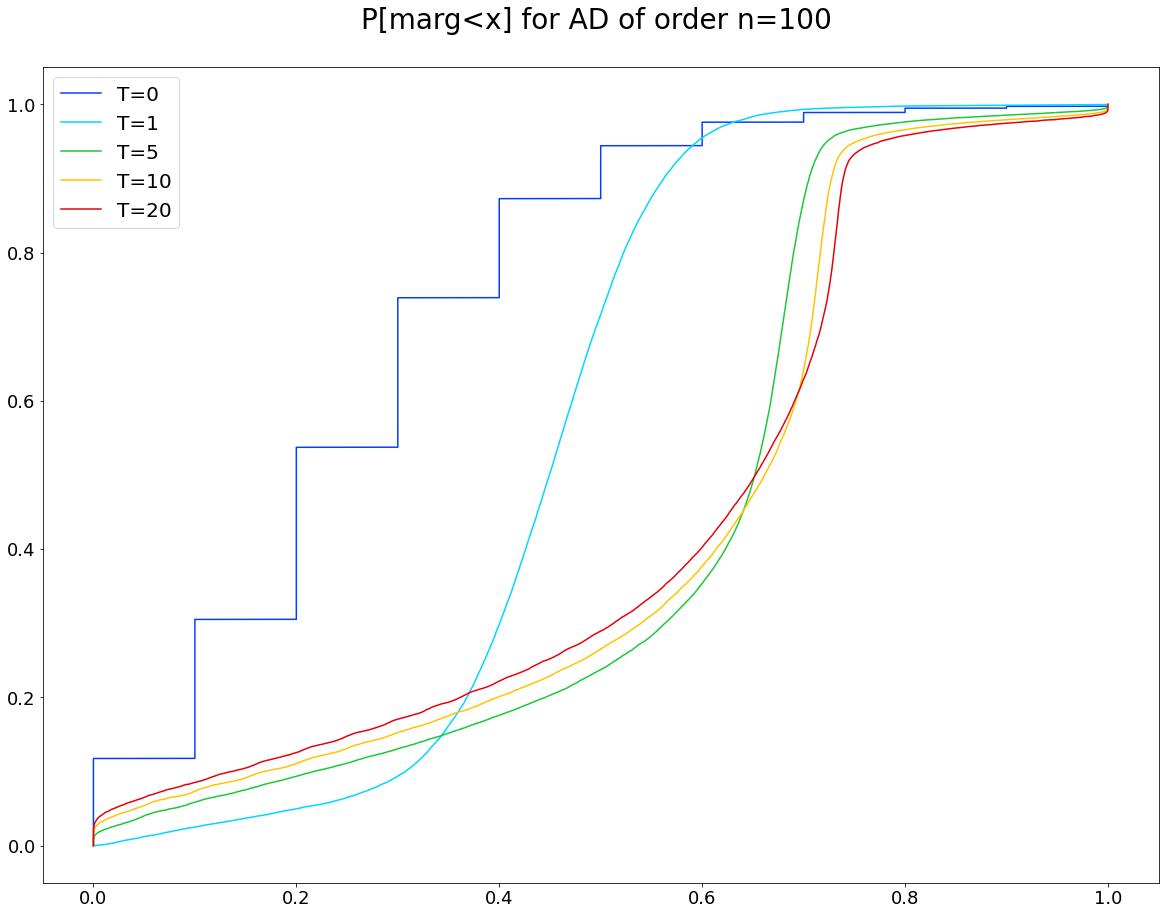

In [ ]:
list00=np.sort(listmar00)
list01=np.sort(listmar01)
list05=np.sort(listmar05)
list10=np.sort(listmar10)
list20=np.sort(listmar20)
size = np.shape(list00)[0]
figsize=(20,15)
fig = plt.figure(1, figsize)
ax = fig.add_subplot(1,1,1)
ax.set_title('P[marg<x] for AD of order n={} \n'.format(n), fontsize=28)
plt.xticks(size=18)
plt.yticks(size=18)
ax.plot(list00, np.arange(size)/size,label='T=0', color=sns.color_palette("bright", 10)[0])
ax.plot(list01, np.arange(size)/size,label='T=1', color=sns.color_palette("bright", 10)[9])
ax.plot(list05, np.arange(size)/size,label='T=5', color=sns.color_palette("bright", 10)[2])
ax.plot(list10, np.arange(size)/size,label='T=10', color=sns.color_palette("bright", 10)[8])
ax.plot(list20, np.arange(size)/size,label='T=20', color=sns.color_palette("bright", 10)[3])
ax.legend(fontsize=20)

In [ ]:
A, _, _, _ = aztec_graph(100, False)

# Marginals
plot_heatmap(A,100,listmar00,0, False)
plot_heatmap(A,100,listmar01,1, False)
plot_heatmap(A,100,listmar05,5, False)
plot_heatmap(A,100,listmar10,10, False)
plot_heatmap(A,100,listmar20,20, False)

# Variance
plot_heatmap(A,100,varmar00,0, True)
plot_heatmap(A,100,varmar01,1, True)
plot_heatmap(A,100,varmar05,5, True)
plot_heatmap(A,100,varmar10,10, True)
plot_heatmap(A,100,varmar20,20, True)

KeyboardInterrupt: ignored

# Aztec diamond n=50

In [ ]:
n = 50
it = 10
file_marginals_50="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_{}_it_{}.txt".format(n,it)
file_bethe_50="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_{}_it_{}.txt".format(n,it)

f_mar = open(file_marginals_50, 'r')
f_bethe = open(file_bethe_50, 'r')
# print(f_mar)
data_50 = np.loadtxt(f_mar, str)
bethe_50 = np.loadtxt(f_bethe, str)
bethe_list_50 = np.array(bethe_50[1:,:], dtype=float)
# print(bethe_list_50)

# T = 0
listmar00 = np.array(data_50[1:,0], dtype=float) # 0th column
varmar00 = np.array(data_50[1:,1], dtype=float)

# T = 1
listmar01 = np.array(data_50[1:,2], dtype=float)
varmar01 = np.array(data_50[1:,3], dtype=float)

# T = 5
listmar05 = np.array(data_50[1:,4], dtype=float)
varmar05 = np.array(data_50[1:,5], dtype=float)

# T = 10
listmar10 = np.array(data_50[1:,6], dtype=float)
varmar10 = np.array(data_50[1:,7], dtype=float)

# T = 20
listmar20 = np.array(data_50[1:,8], dtype=float)
varmar20 = np.array(data_50[1:,9], dtype=float)

[[ 0.56007826  1.74289826  7.99670214 15.49341603 30.139104  ]]


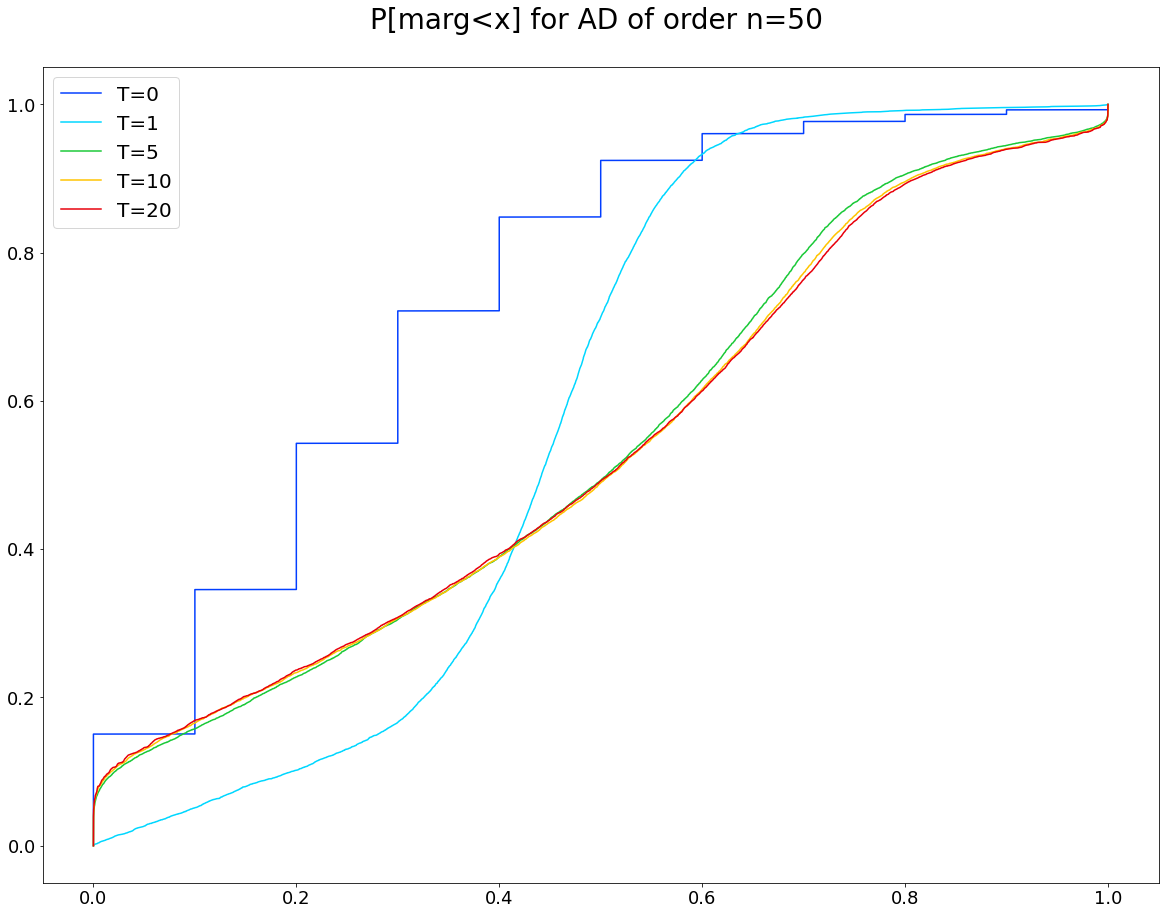

In [ ]:
list00=np.sort(listmar00)
list01=np.sort(listmar01)
list05=np.sort(listmar05)
list10=np.sort(listmar10)
list20=np.sort(listmar20)
size = np.shape(list00)[0]
figsize=(20,15)
fig = plt.figure(1, figsize)
ax = fig.add_subplot(1,1,1)
ax.set_title('P[marg<x] for AD of order n={} \n'.format(n), fontsize=28)
plt.xticks(size=18)
plt.yticks(size=18)
ax.plot(list00, np.arange(size)/size,label='T=0', color=sns.color_palette("bright", 10)[0])
ax.plot(list01, np.arange(size)/size,label='T=1', color=sns.color_palette("bright", 10)[9])
ax.plot(list05, np.arange(size)/size,label='T=5', color=sns.color_palette("bright", 10)[2])
ax.plot(list10, np.arange(size)/size,label='T=10', color=sns.color_palette("bright", 10)[8])
ax.plot(list20, np.arange(size)/size,label='T=20', color=sns.color_palette("bright", 10)[3])
ax.legend(fontsize=20)

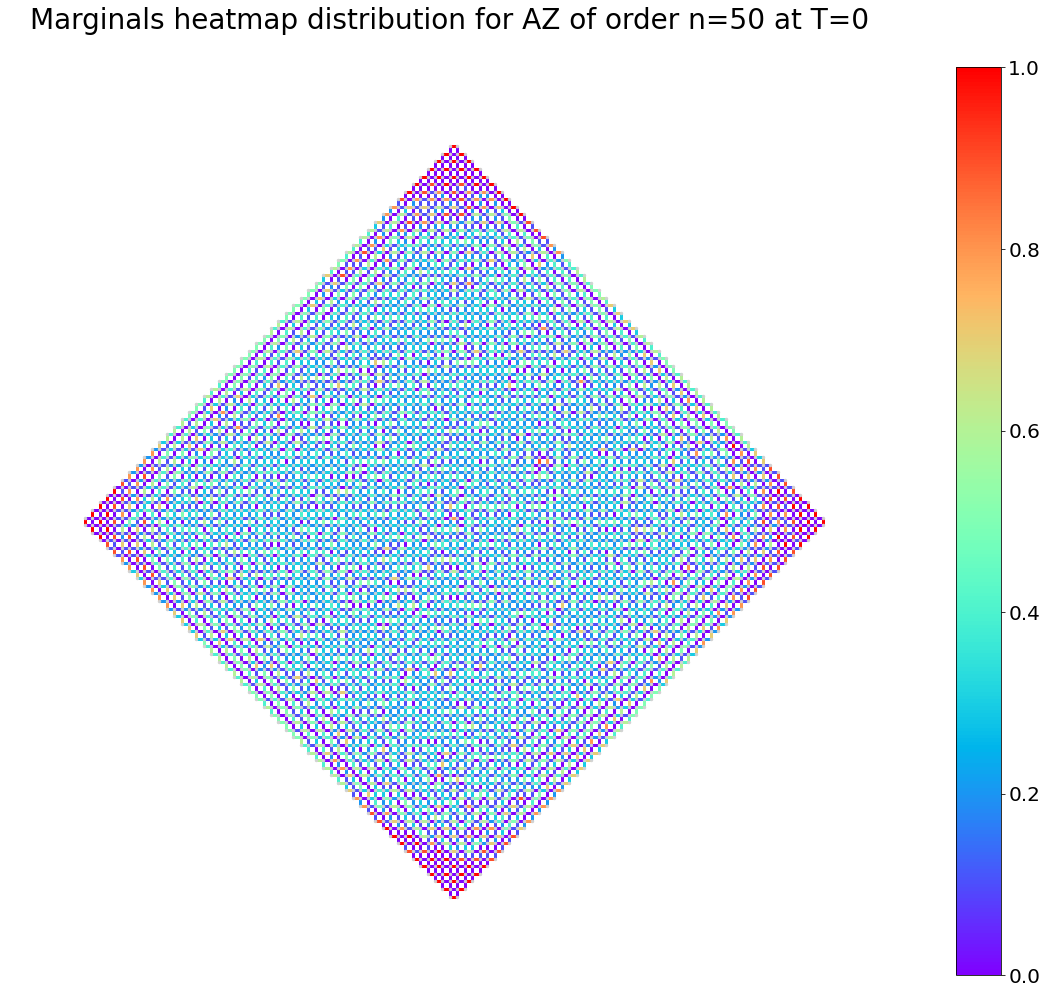

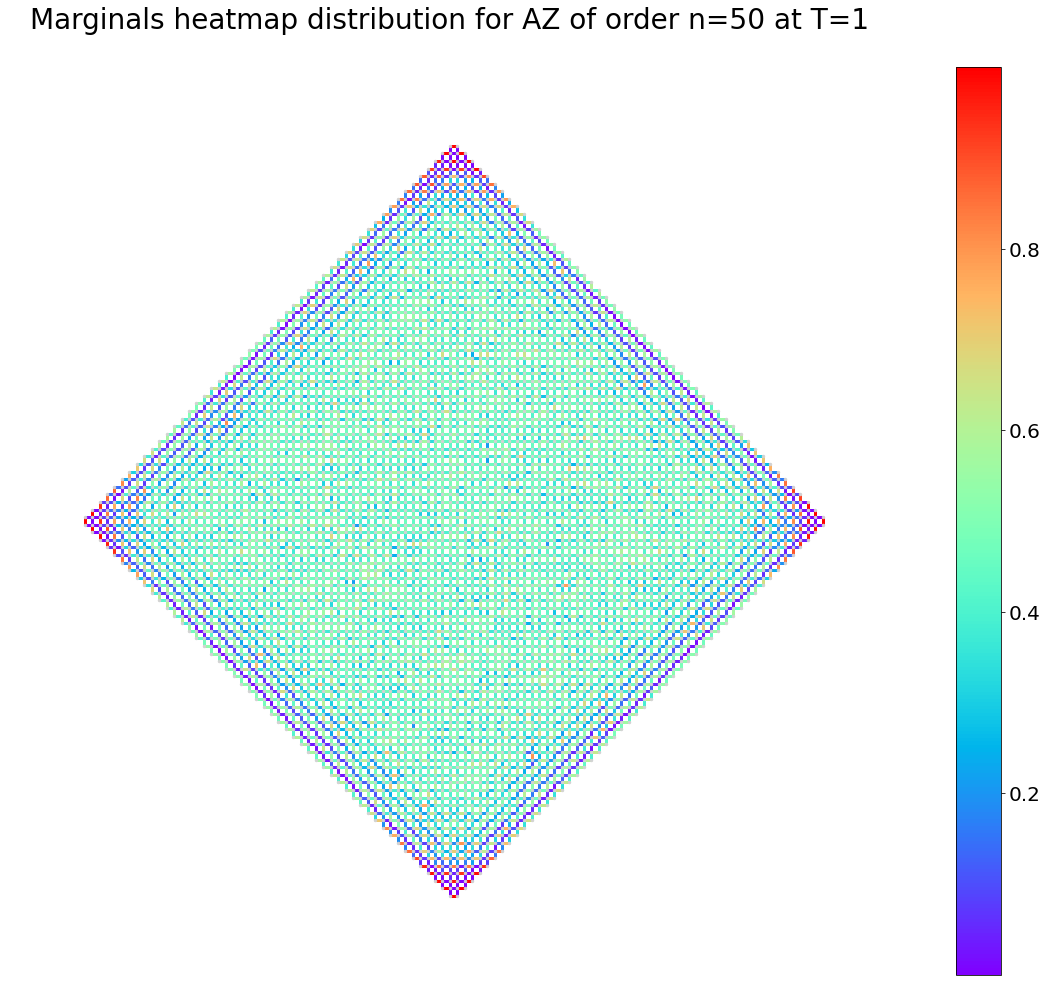

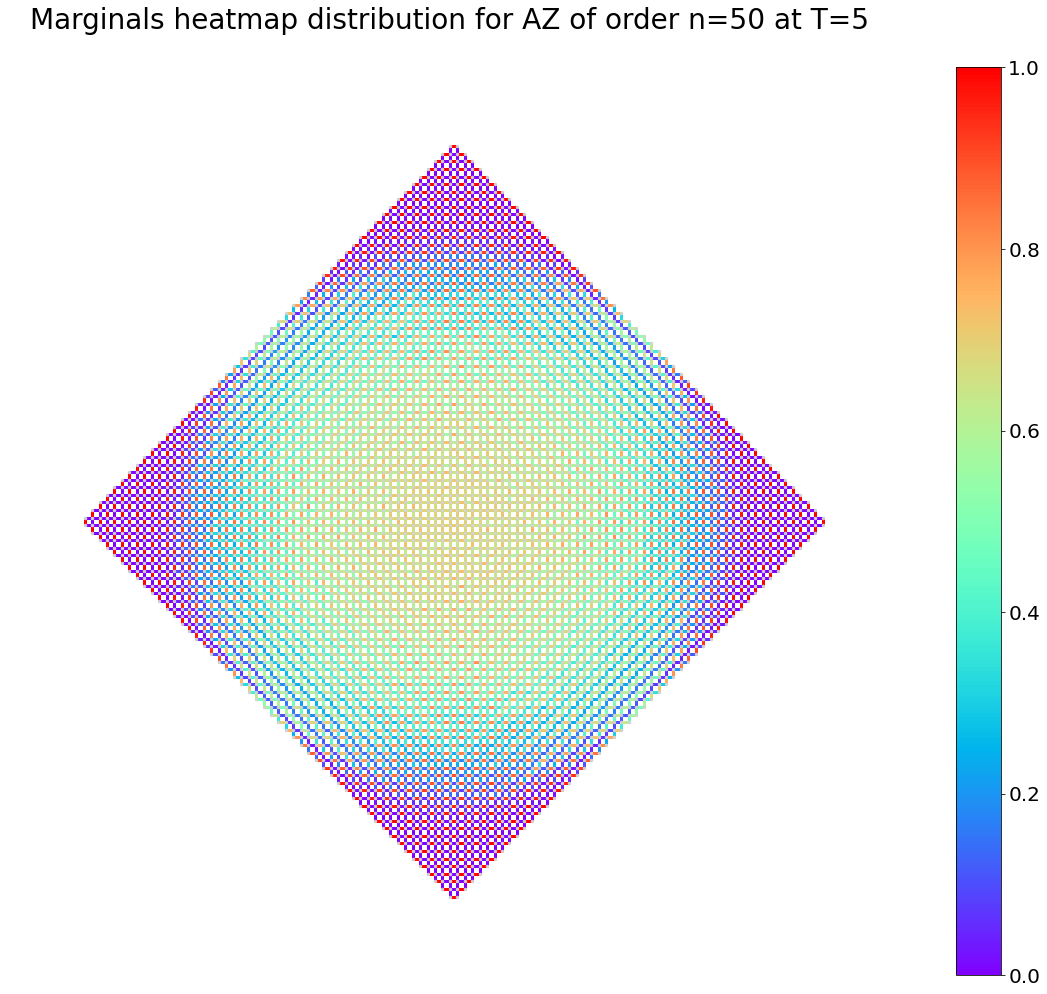

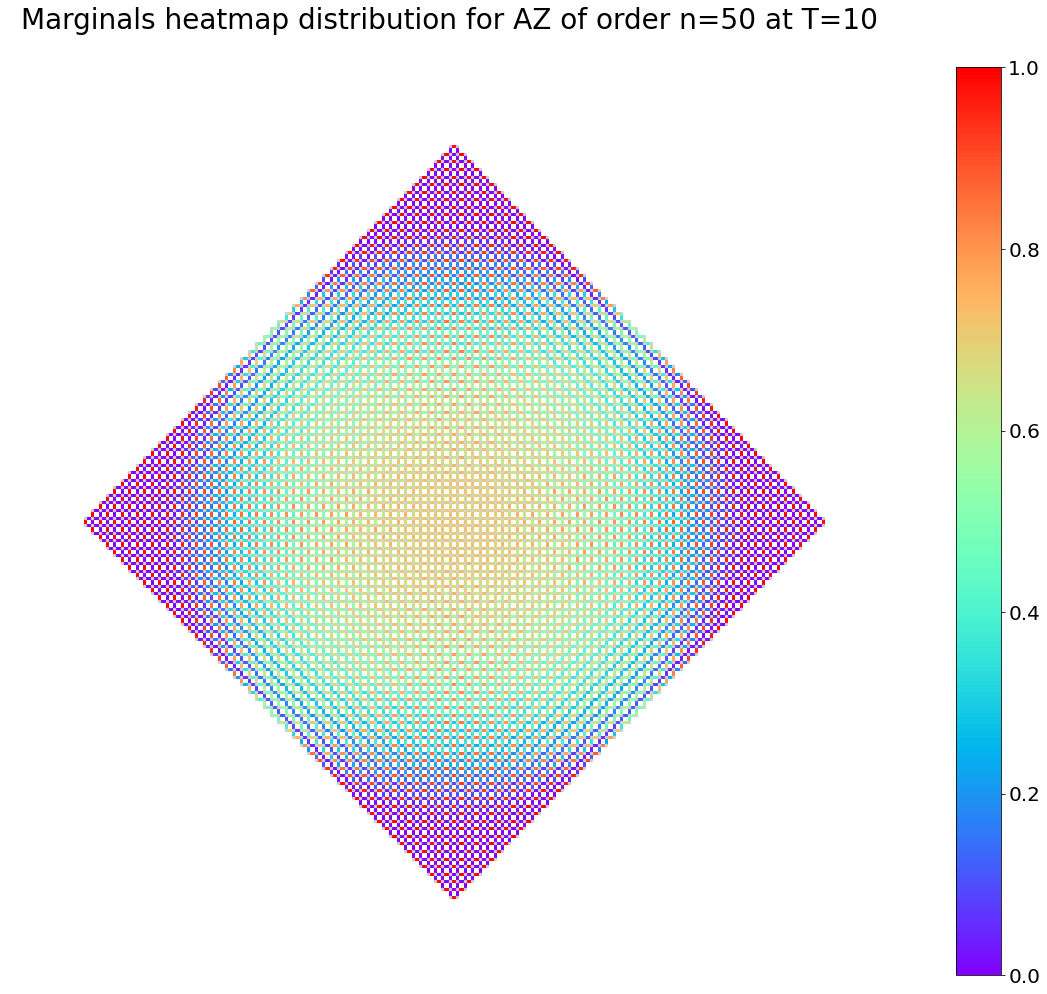

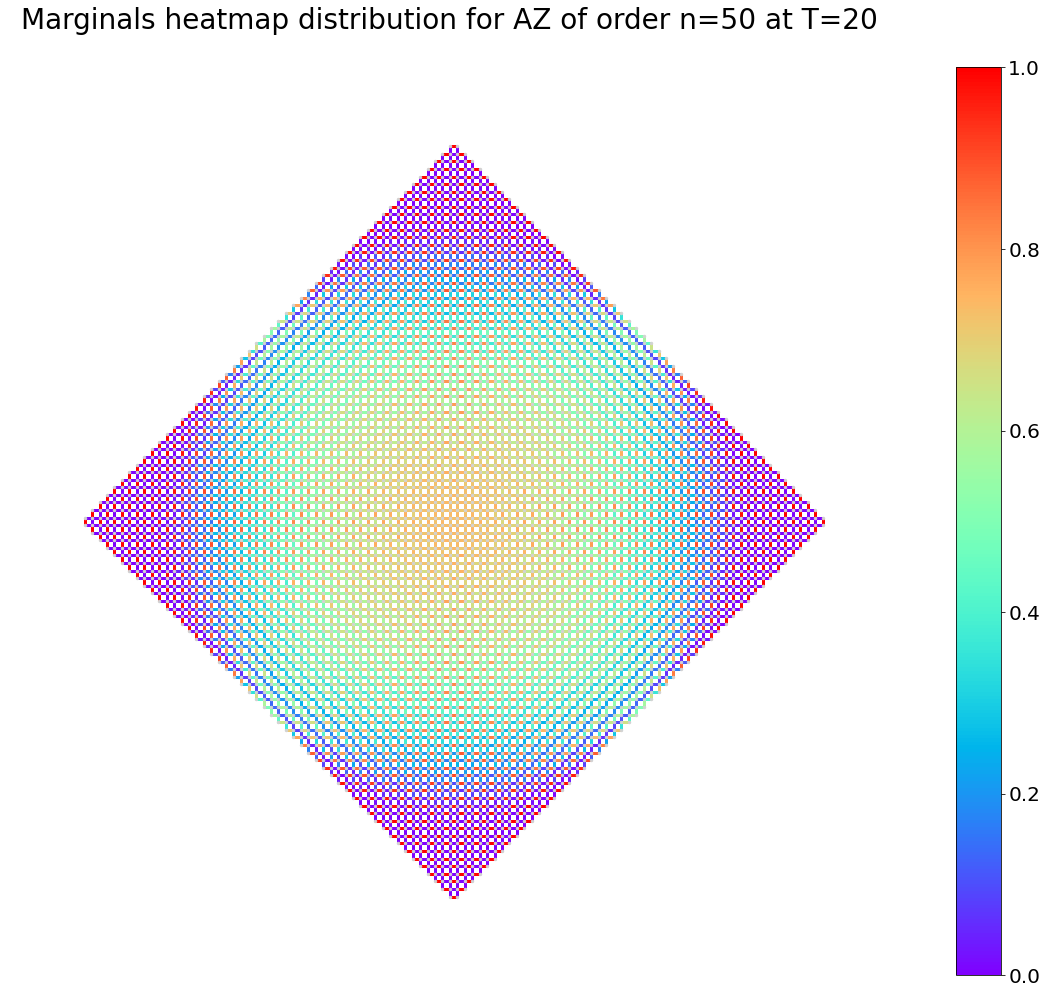

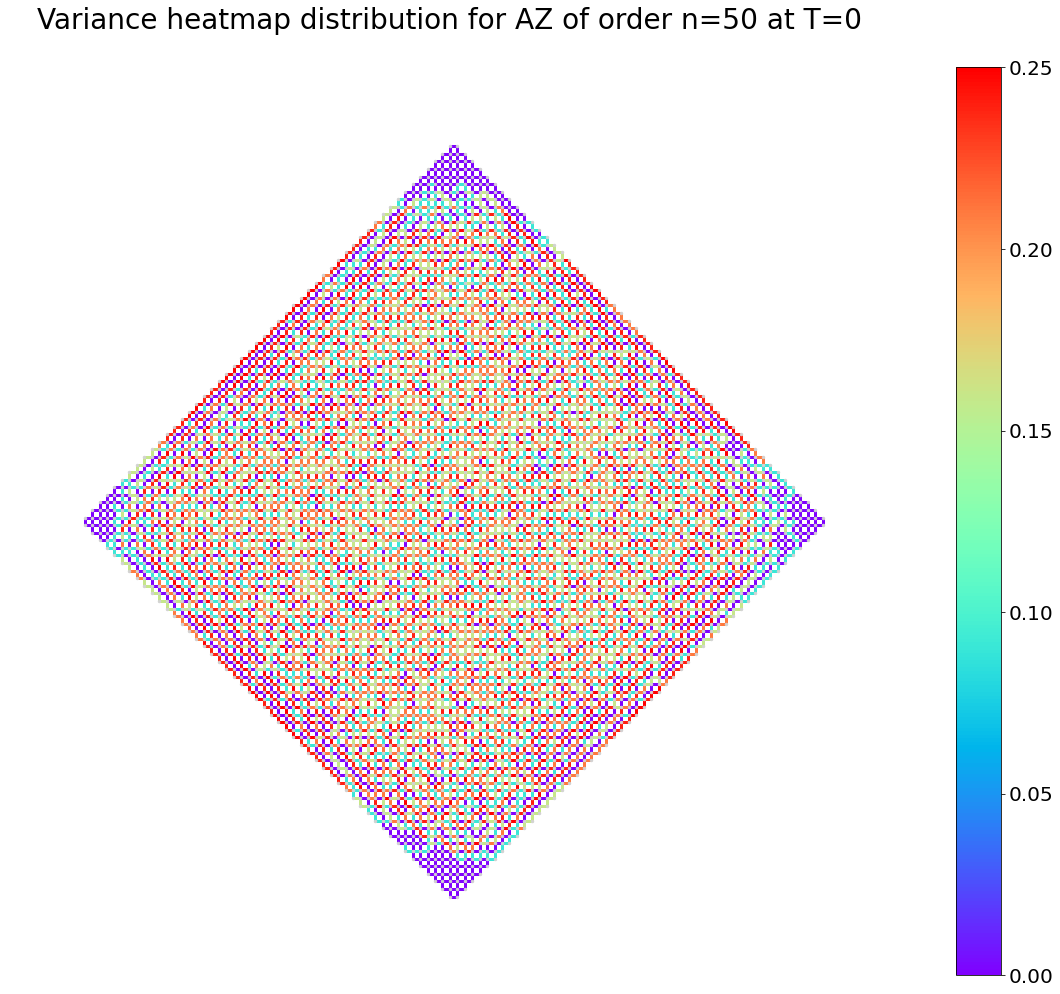

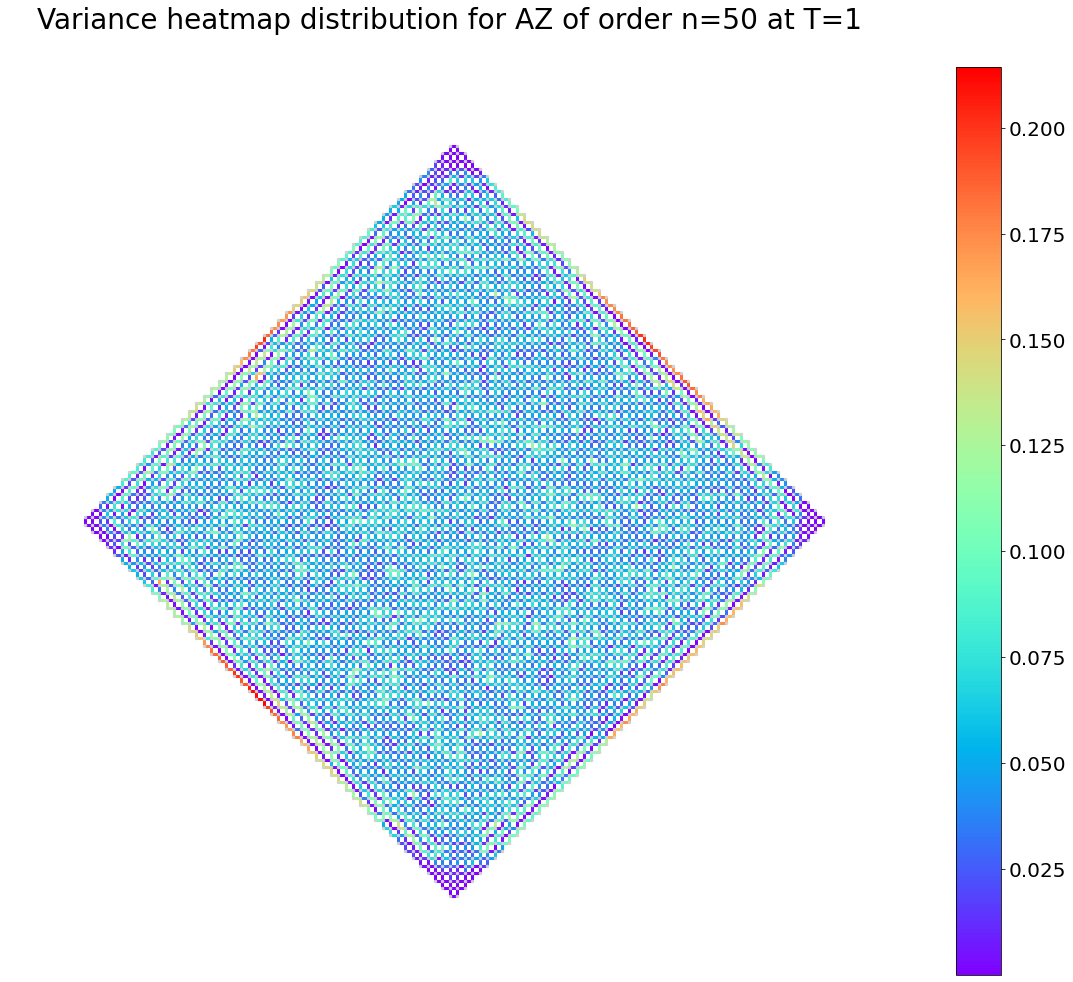

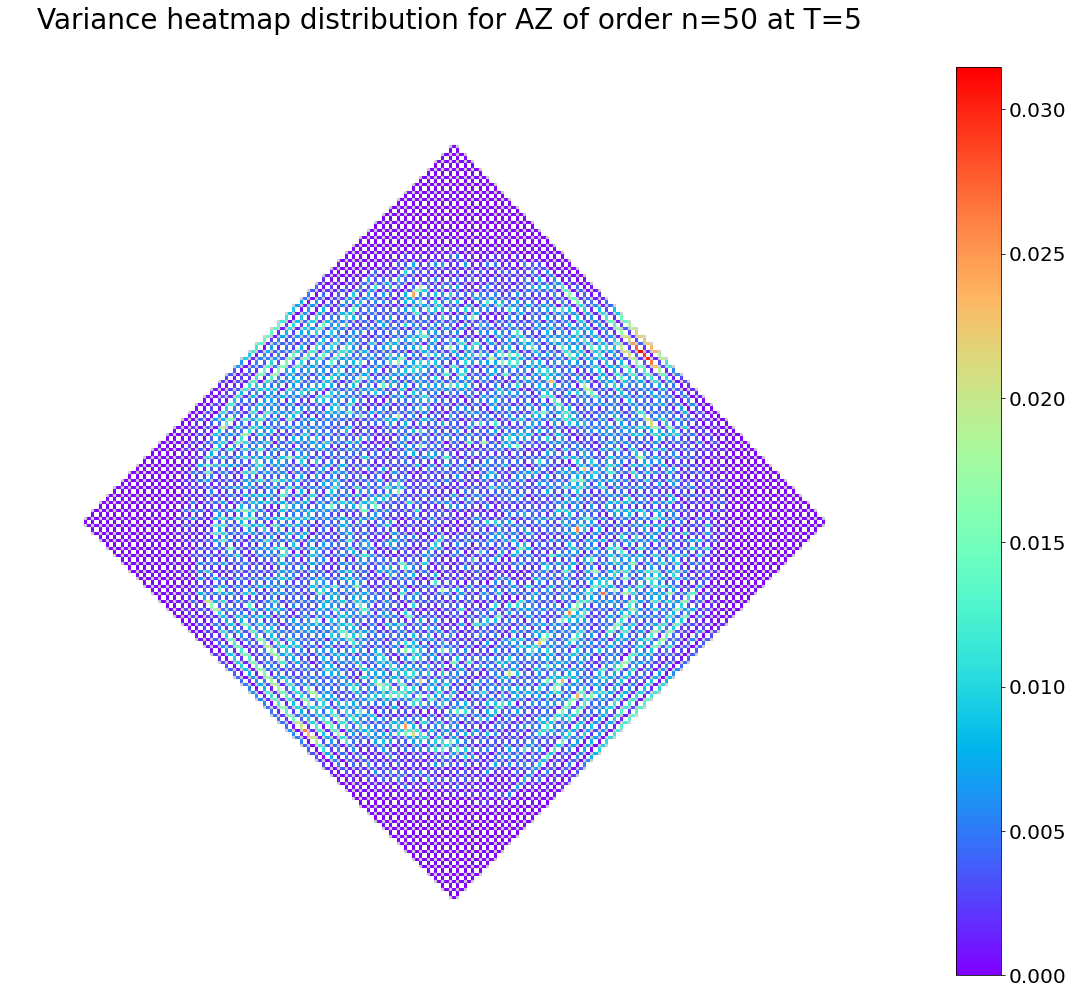

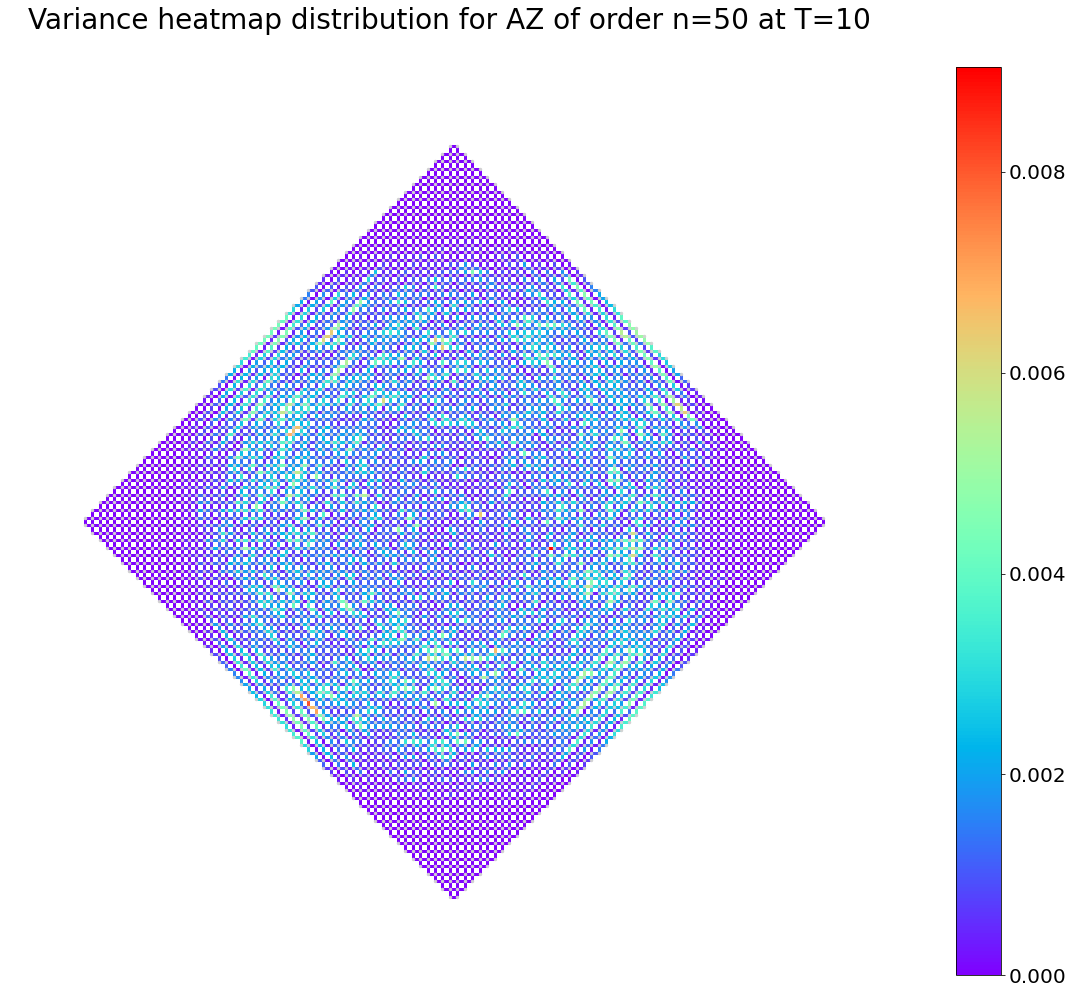

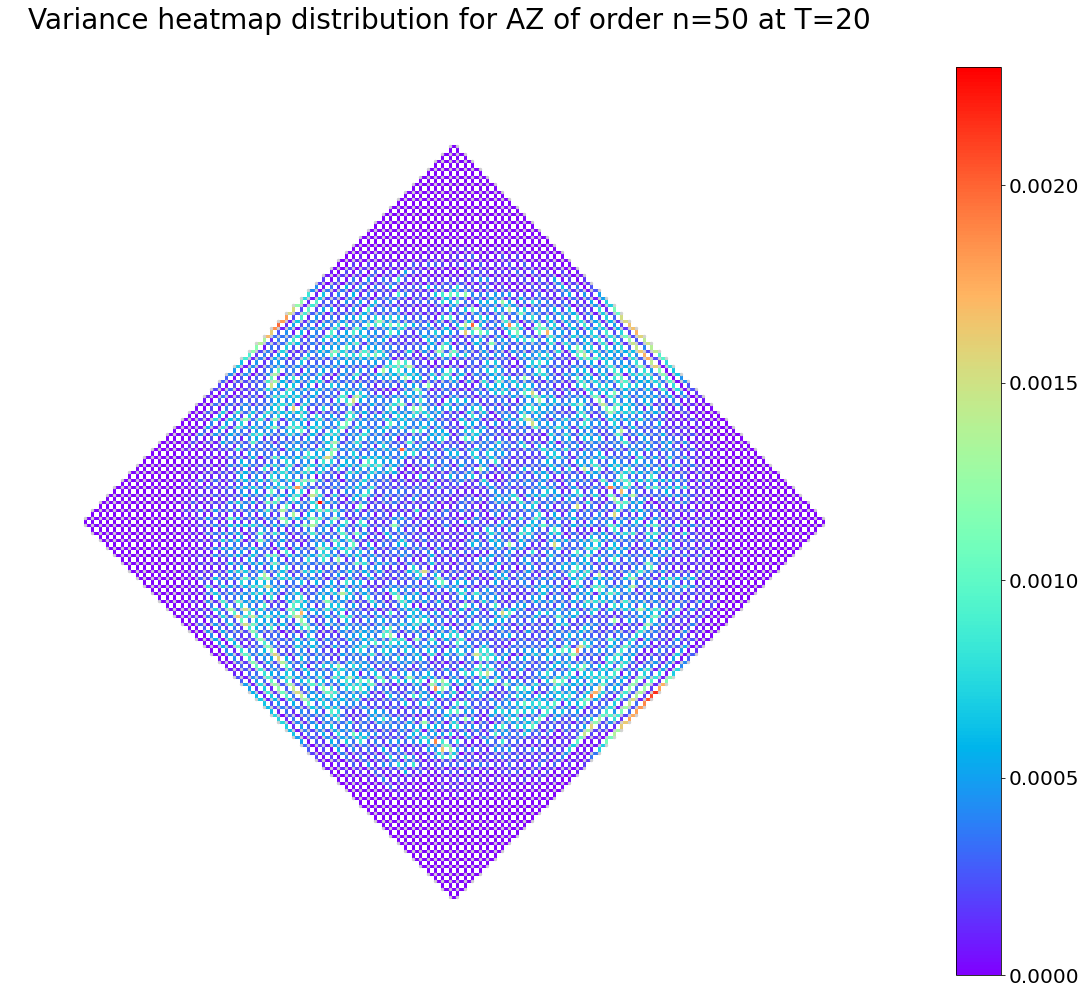

In [ ]:
A, _, _, _ = aztec_graph(50, False)

# Marginals
plot_heatmap(A,50,listmar00,0, False)
plot_heatmap(A,50,listmar01,1, False)
plot_heatmap(A,50,listmar05,5, False)
plot_heatmap(A,50,listmar10,10, False)
plot_heatmap(A,50,listmar20,20, False)

# Variance
plot_heatmap(A,50,varmar00,0, True)
plot_heatmap(A,50,varmar01,1, True)
plot_heatmap(A,50,varmar05,5, True)
plot_heatmap(A,50,varmar10,10, True)
plot_heatmap(A,50,varmar20,20, True)

# Aztec diamond n=40

In [ ]:
n = 40
it = 100
file_marginals_40="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_{}_it_{}.txt".format(n,it)
file_bethe_40="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_{}_it_{}.txt".format(n,it)

f_mar = open(file_marginals_40, 'r')
f_bethe = open(file_bethe_40, 'r')
# print(f_mar)
data_40 = np.loadtxt(f_mar, str)
bethe_40 = np.loadtxt(f_bethe, str)
bethe_list_40 = np.array(bethe_40[1:,:], dtype=float)
print(bethe_list_40)

# T = 0
listmar00 = np.array(data_40[1:,0], dtype=float) # 0th column
varmar00 = np.array(data_40[1:,1], dtype=float)

# T = 1
listmar01 = np.array(data_40[1:,2], dtype=float)
varmar01 = np.array(data_40[1:,3], dtype=float)

# T = 5
listmar05 = np.array(data_40[1:,4], dtype=float)
varmar05 = np.array(data_40[1:,5], dtype=float)

# T = 10
listmar10 = np.array(data_40[1:,6], dtype=float)
varmar10 = np.array(data_40[1:,7], dtype=float)

# T = 20
listmar20 = np.array(data_40[1:,8], dtype=float)
varmar20 = np.array(data_40[1:,9], dtype=float)

[[ 0.57821299  1.70680836  7.69322868 14.89032306 29.04643171]]


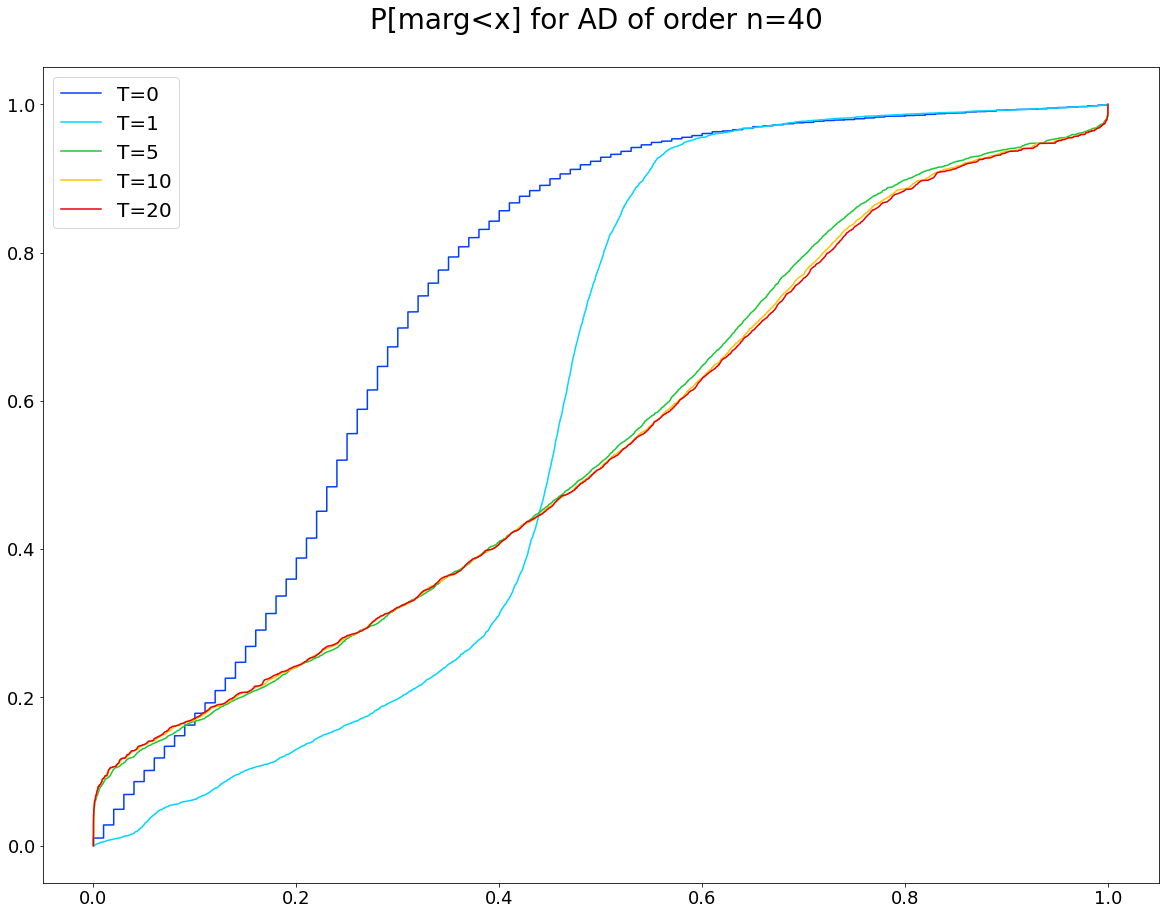

In [ ]:
list00=np.sort(listmar00)
list01=np.sort(listmar01)
list05=np.sort(listmar05)
list10=np.sort(listmar10)
list20=np.sort(listmar20)
size = np.shape(list00)[0]
figsize=(20,15)
fig = plt.figure(1, figsize)
ax = fig.add_subplot(1,1,1)
ax.set_title('P[marg<x] for AD of order n={} \n'.format(n), fontsize=28)
plt.xticks(size=18)
plt.yticks(size=18)
ax.plot(list00, np.arange(size)/size,label='T=0', color=sns.color_palette("bright", 10)[0])
ax.plot(list01, np.arange(size)/size,label='T=1', color=sns.color_palette("bright", 10)[9])
ax.plot(list05, np.arange(size)/size,label='T=5', color=sns.color_palette("bright", 10)[2])
ax.plot(list10, np.arange(size)/size,label='T=10', color=sns.color_palette("bright", 10)[8])
ax.plot(list20, np.arange(size)/size,label='T=20', color=sns.color_palette("bright", 10)[3])
ax.legend(fontsize=20)

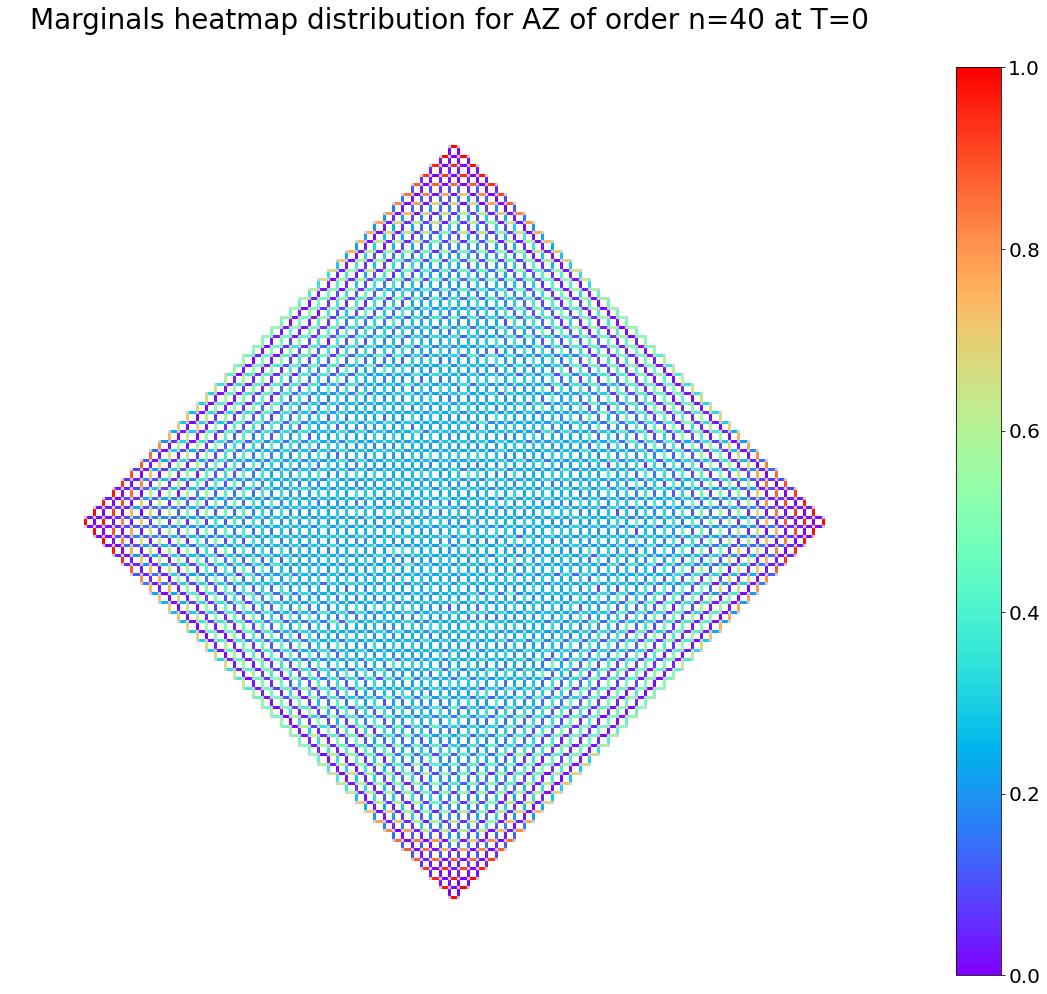

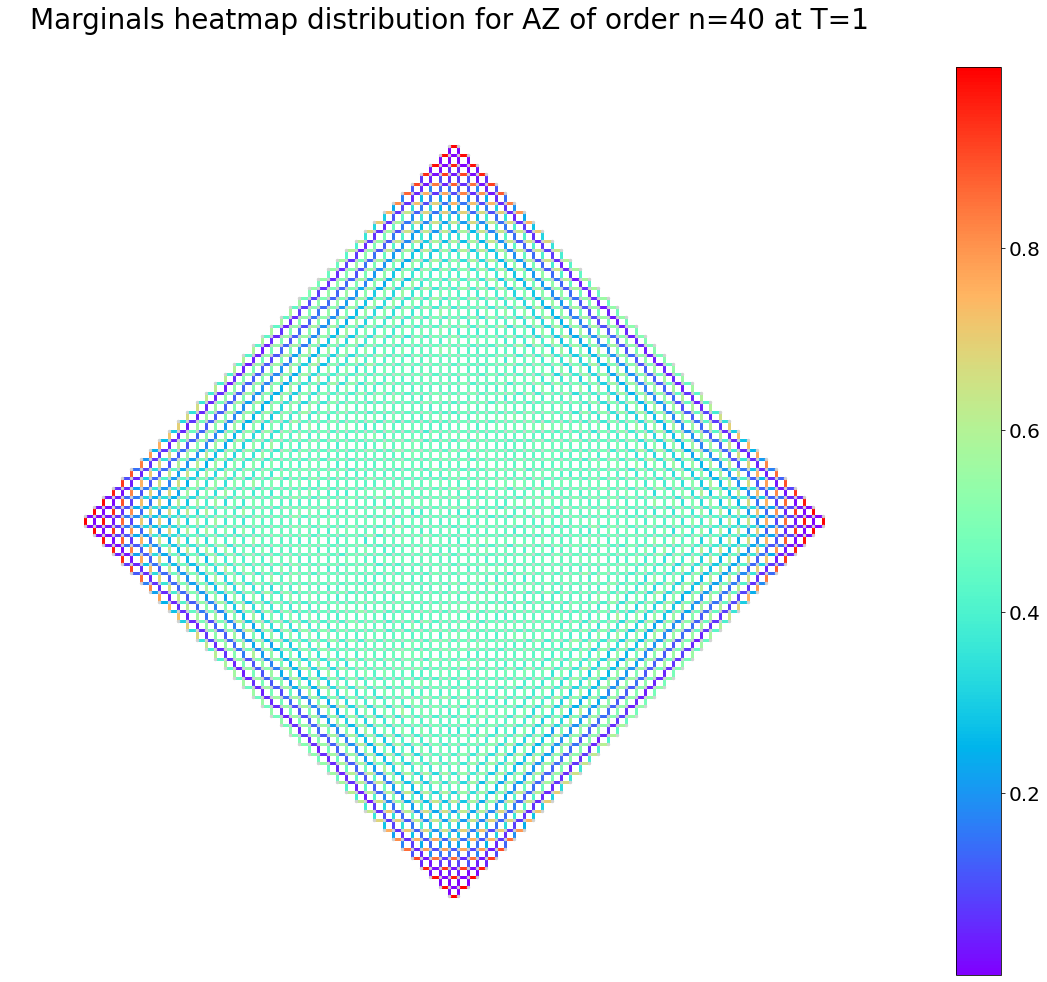

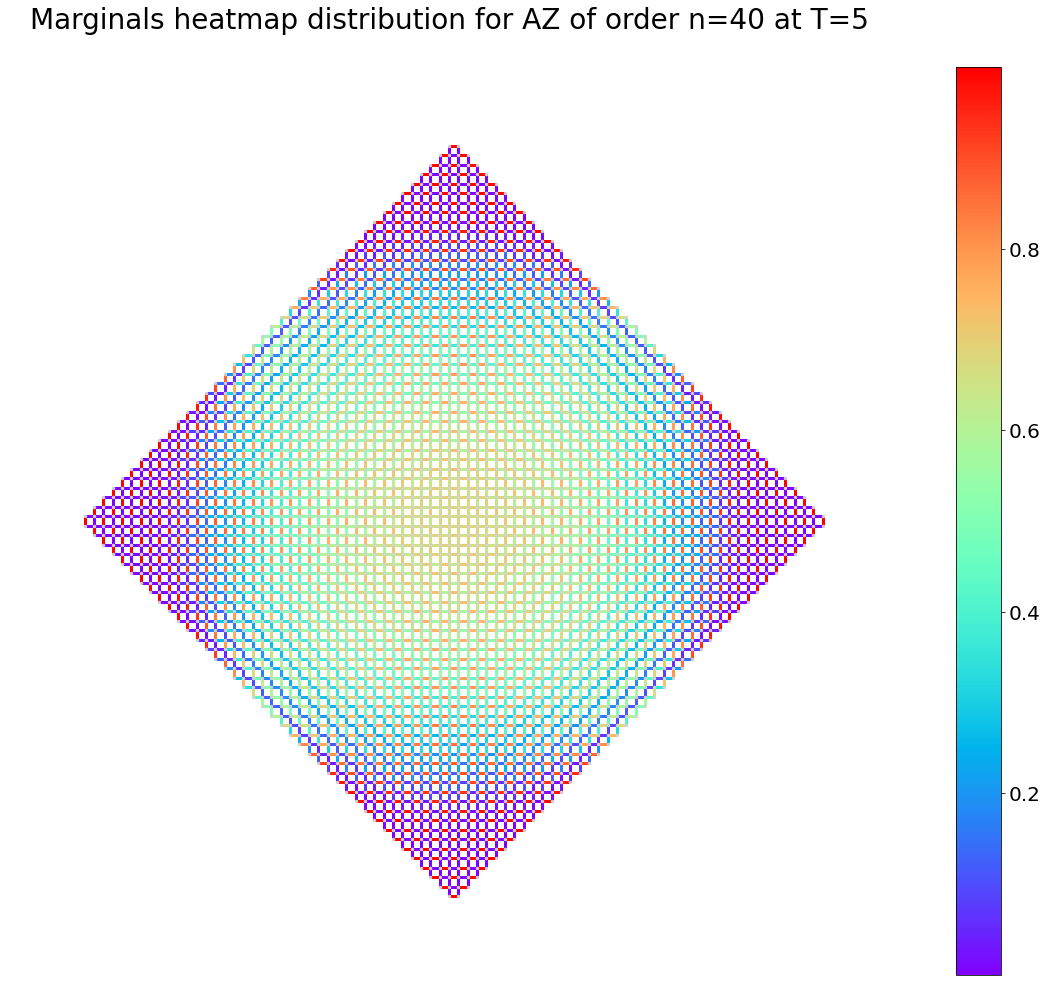

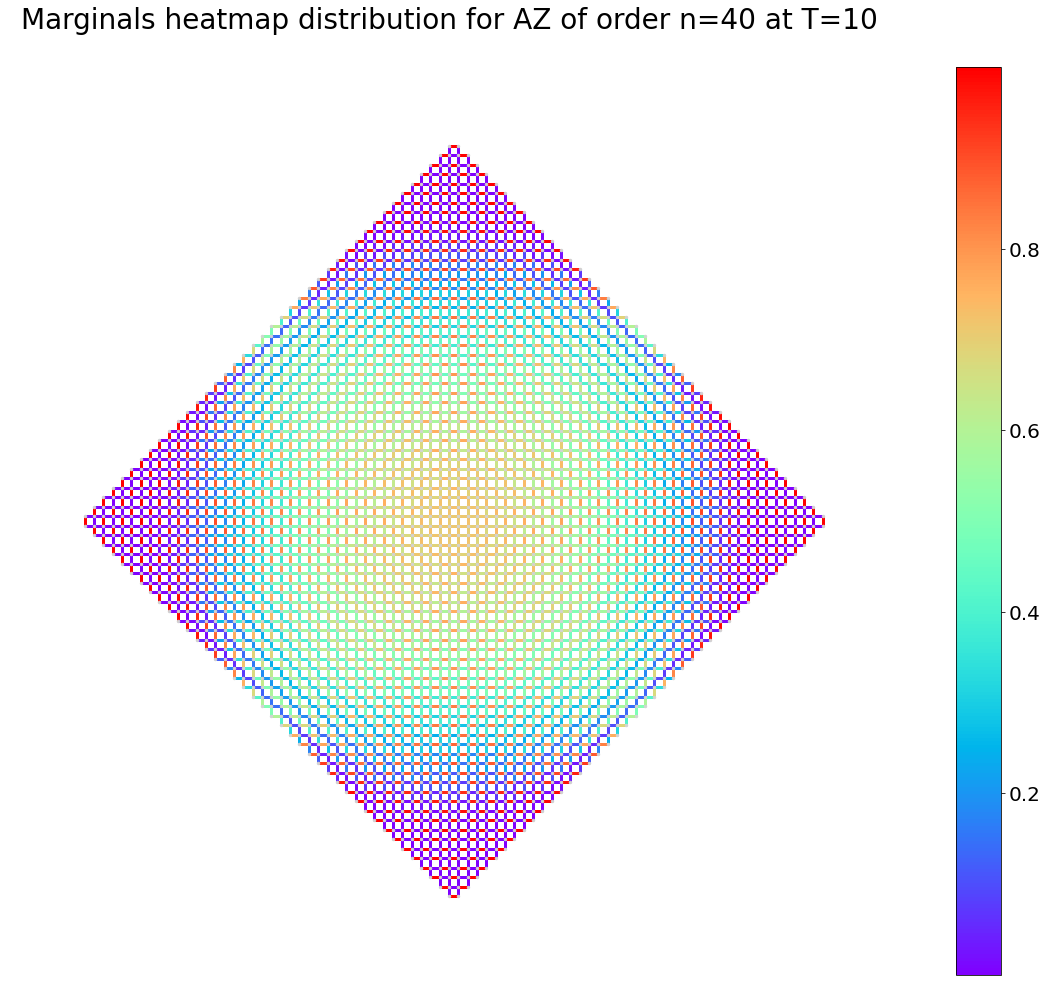

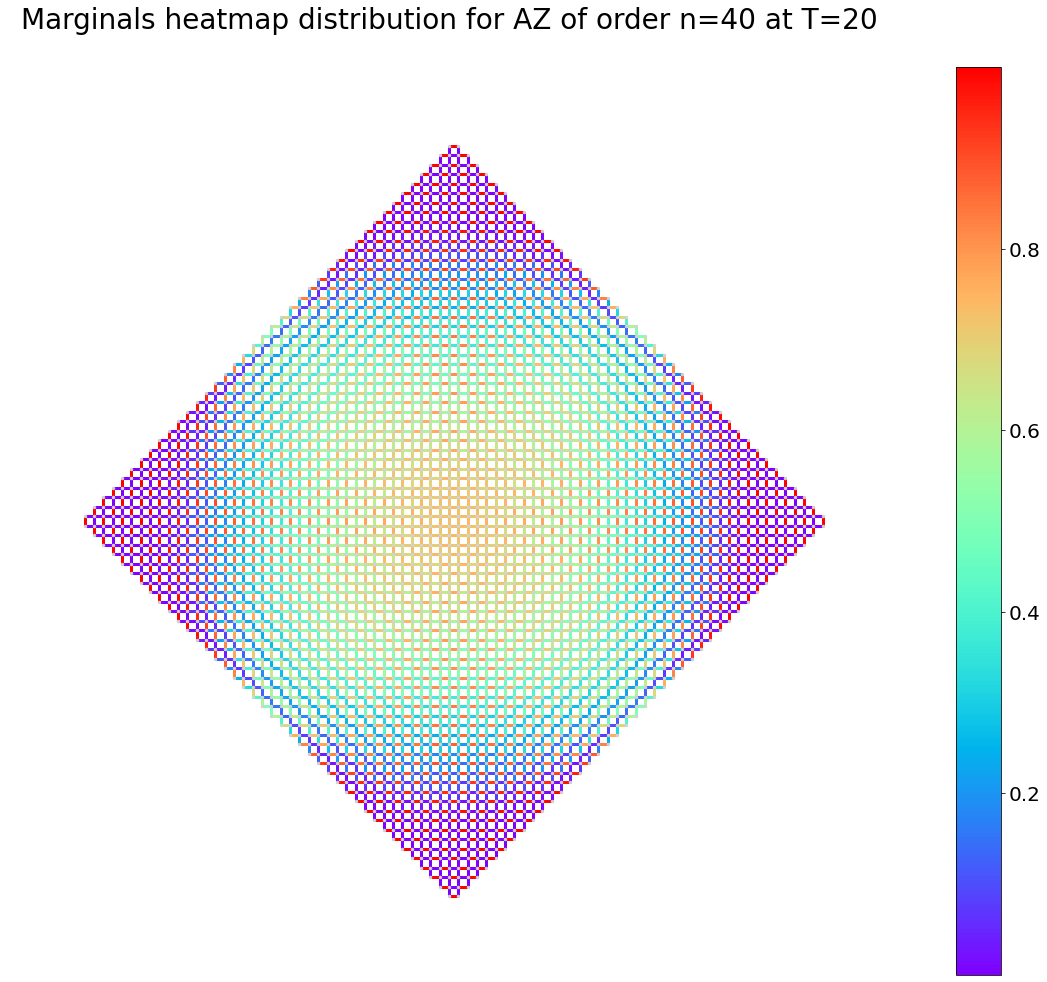

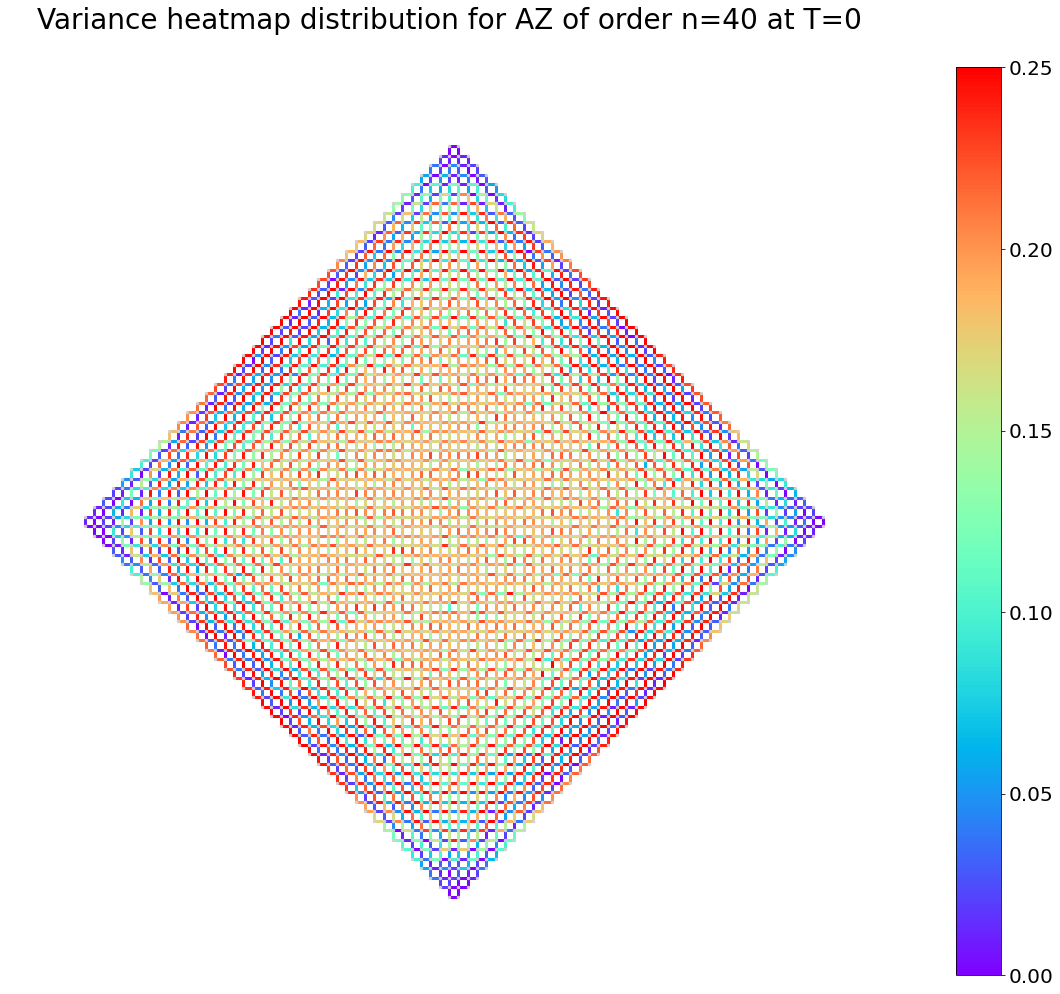

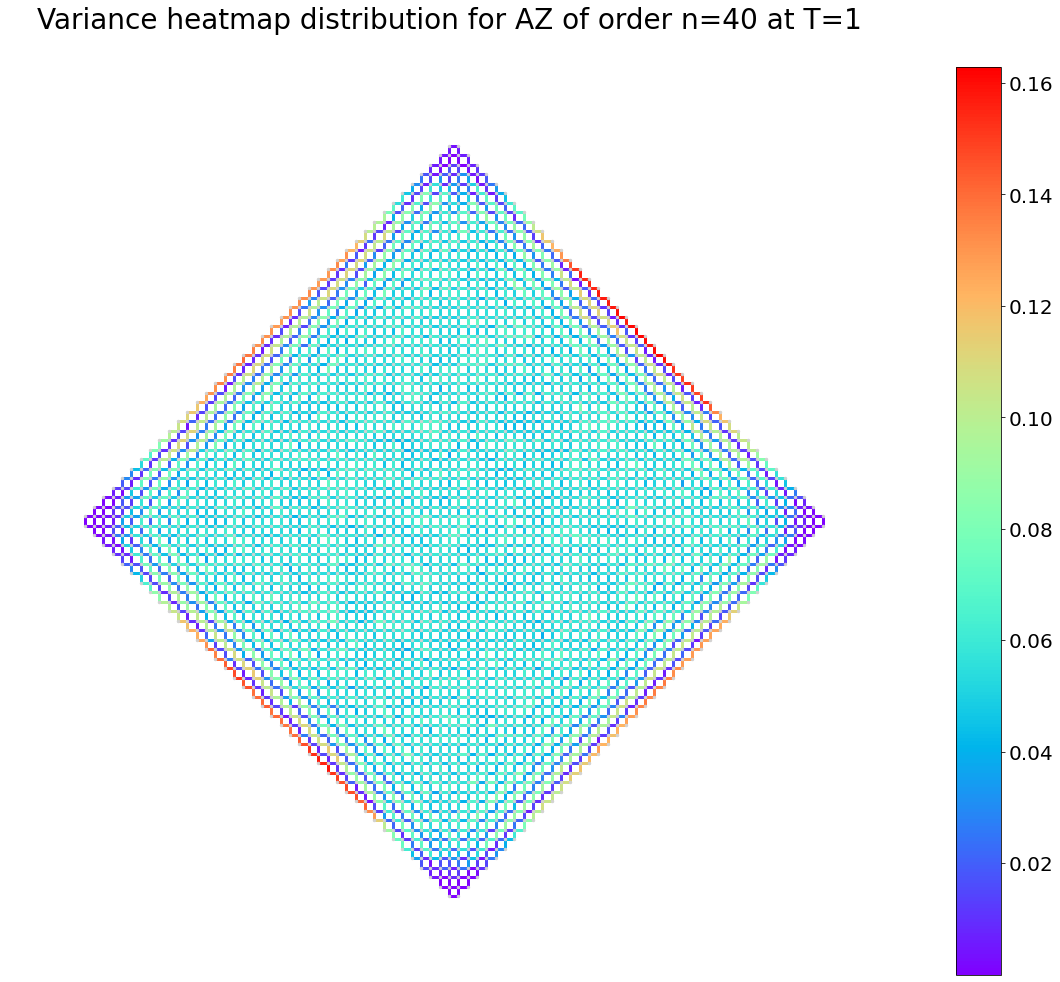

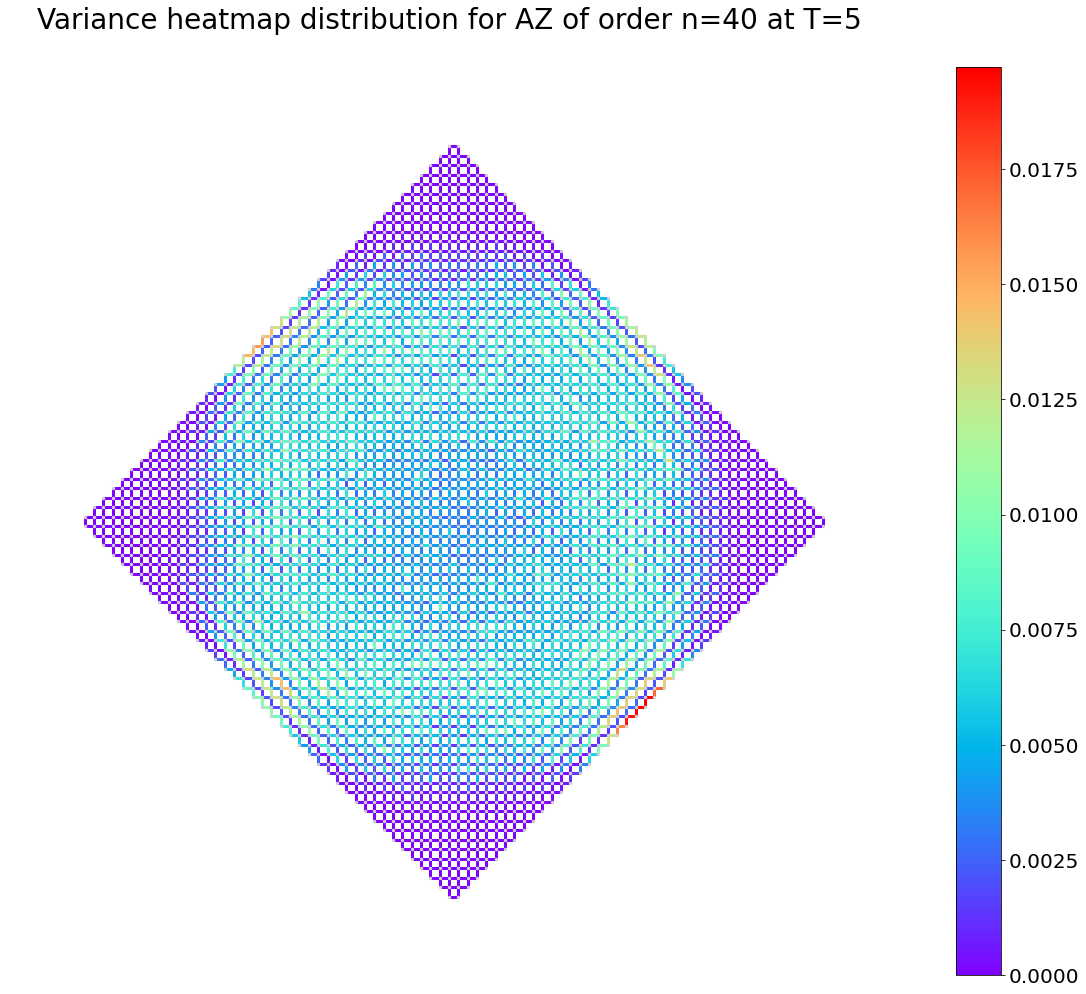

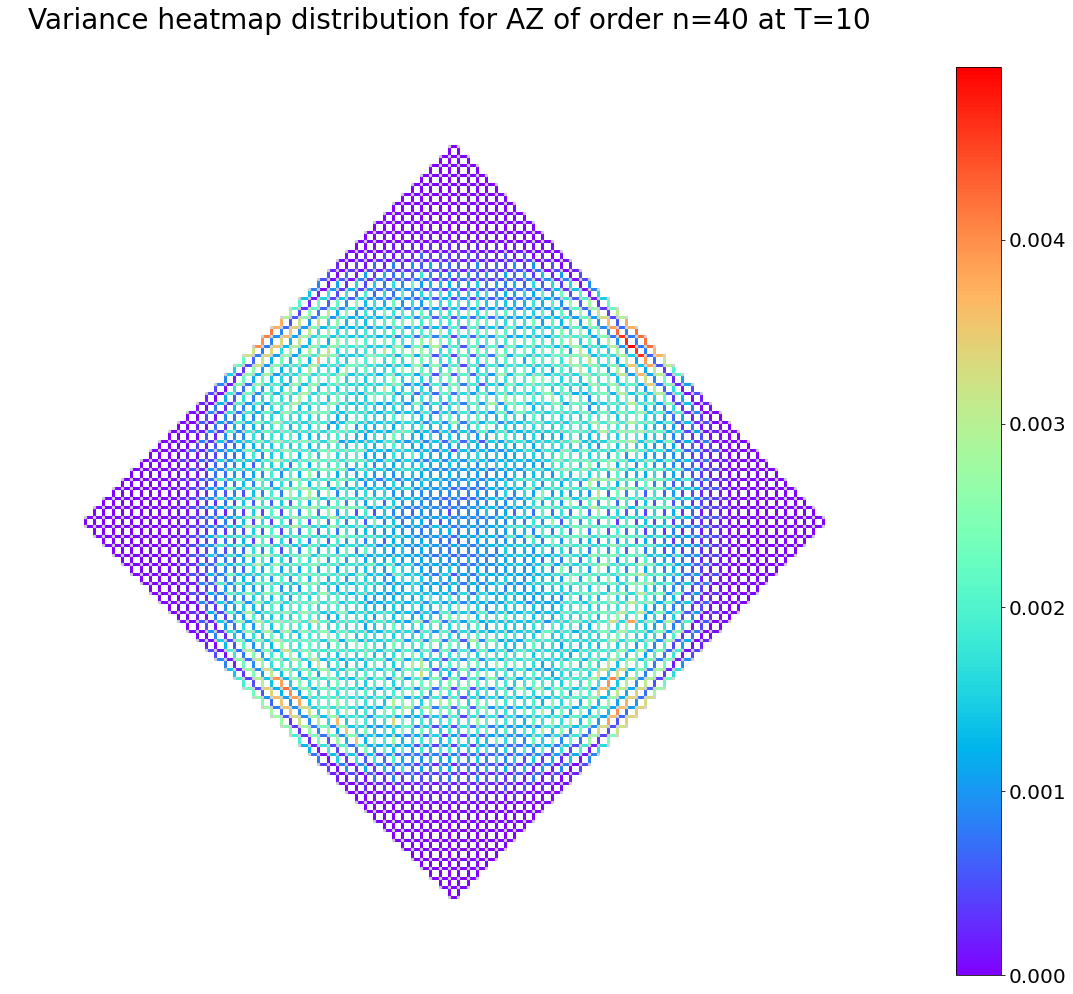

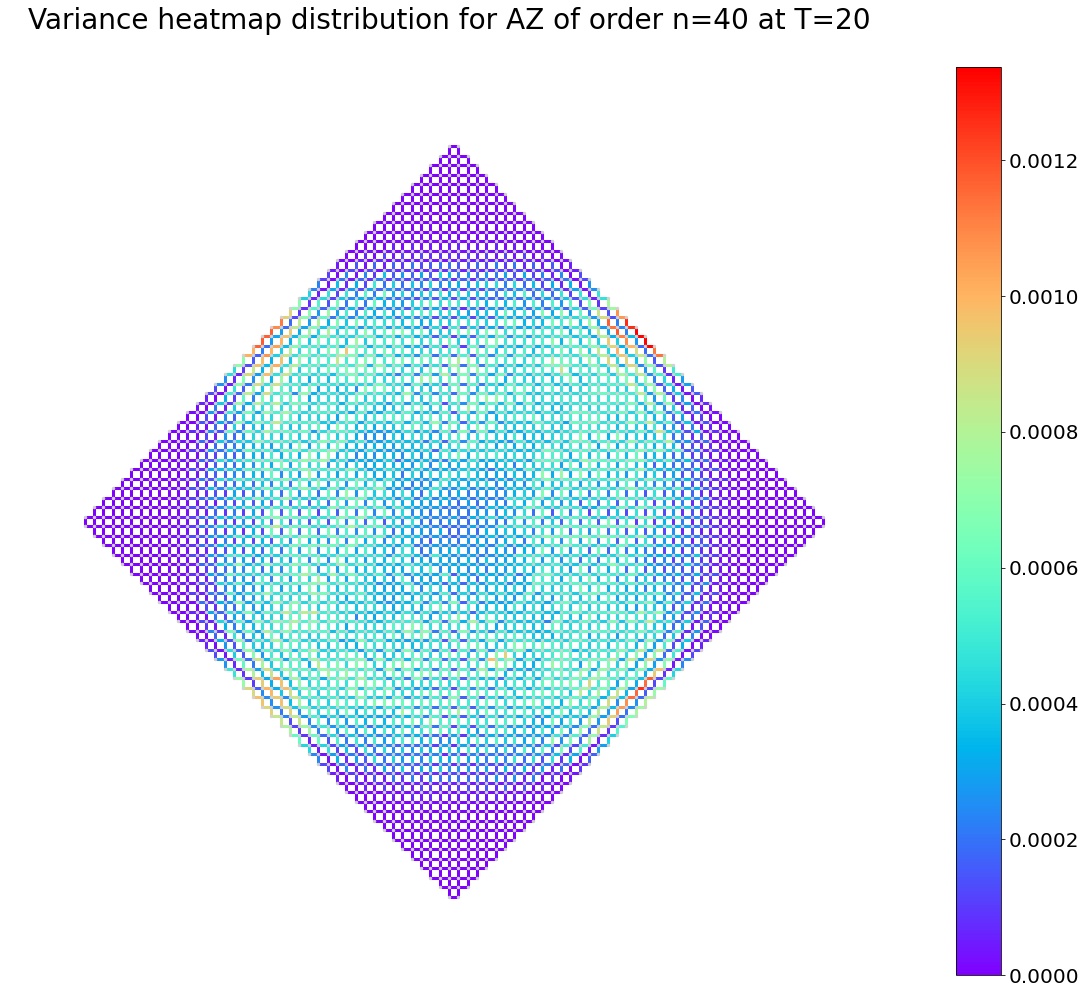

In [ ]:
A, _, _, _ = aztec_graph(40, False)

# Marginals
plot_heatmap(A,40,listmar00,0, False)
plot_heatmap(A,40,listmar01,1, False)
plot_heatmap(A,40,listmar05,5, False)
plot_heatmap(A,40,listmar10,10, False)
plot_heatmap(A,40,listmar20,20, False)

# Variance
plot_heatmap(A,40,varmar00,0, True)
plot_heatmap(A,40,varmar01,1, True)
plot_heatmap(A,40,varmar05,5, True)
plot_heatmap(A,40,varmar10,10, True)
plot_heatmap(A,40,varmar20,20, True)

# Aztec diamond n=20

In [ ]:
n = 20
it = 100
file_marginals_20="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_{}_it_{}.txt".format(n,it)
file_bethe_20="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_{}_it_{}.txt".format(n,it)

f_mar = open(file_marginals_20, 'r')
f_bethe = open(file_bethe_20, 'r')
# print(f_mar)
data_20 = np.loadtxt(f_mar, str)
bethe_20 = np.loadtxt(f_bethe, str)
bethe_list_20 = np.array(bethe_20[1:,:], dtype=float)
print(bethe_list_20)

# T = 0
listmar00 = np.array(data_20[1:,0], dtype=float) # 0th column
varmar00 = np.array(data_20[1:,1], dtype=float)

# T = 1
listmar01 = np.array(data_20[1:,2], dtype=float)
varmar01 = np.array(data_20[1:,3], dtype=float)

# T = 5
listmar05 = np.array(data_20[1:,4], dtype=float)
varmar05 = np.array(data_20[1:,5], dtype=float)

# T = 10
listmar10 = np.array(data_20[1:,6], dtype=float)
varmar10 = np.array(data_20[1:,7], dtype=float)

# T = 20
listmar20 = np.array(data_20[1:,8], dtype=float)
varmar20 = np.array(data_20[1:,9], dtype=float)

[[ 0.59991774  1.50508239  7.20583143 13.98068017 27.22717149]]


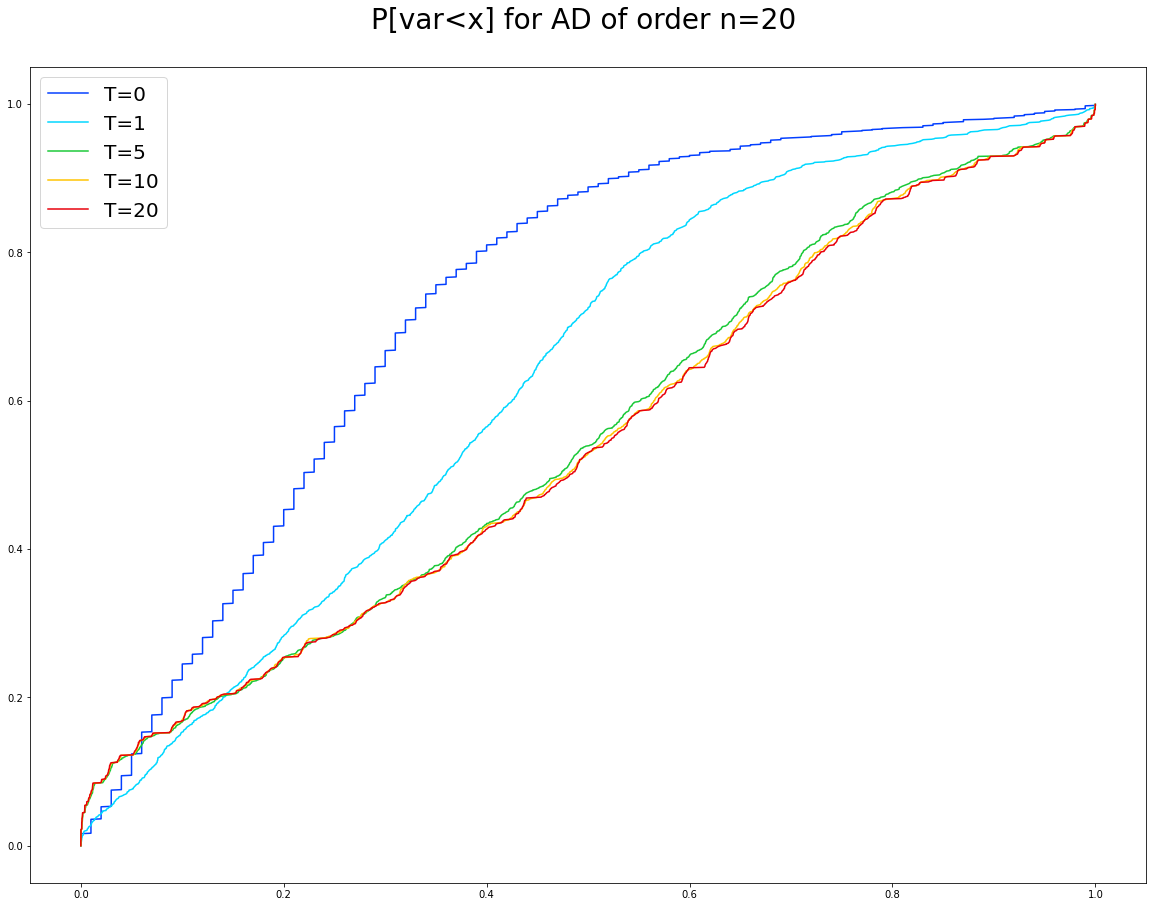

In [ ]:
list00=np.sort(listmar00)
list01=np.sort(listmar01)
list05=np.sort(listmar05)
list10=np.sort(listmar10)
list20=np.sort(listmar20)
size = np.shape(list00)[0]
figsize=(20,15)
fig = plt.figure(1, figsize)
ax = fig.add_subplot(1,1,1)
ax.set_title('P[var<x] for AD of order n={} \n'.format(n), fontsize=28)
ax.plot(list00, np.arange(size)/size,label='T=0', color=sns.color_palette("bright", 10)[0])
ax.plot(list01, np.arange(size)/size,label='T=1', color=sns.color_palette("bright", 10)[9])
ax.plot(list05, np.arange(size)/size,label='T=5', color=sns.color_palette("bright", 10)[2])
ax.plot(list10, np.arange(size)/size,label='T=10', color=sns.color_palette("bright", 10)[8])
ax.plot(list20, np.arange(size)/size,label='T=20', color=sns.color_palette("bright", 10)[3])
ax.legend(fontsize=20)

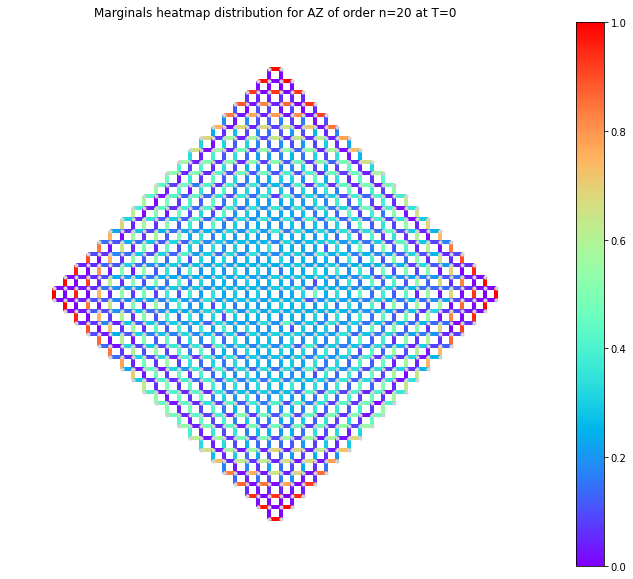

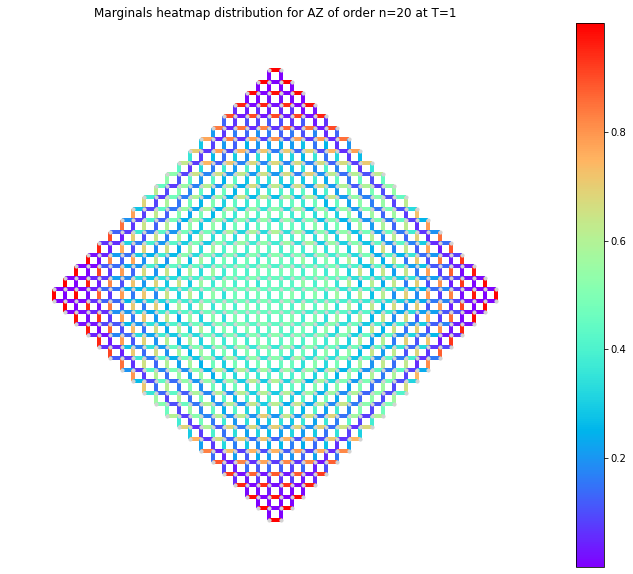

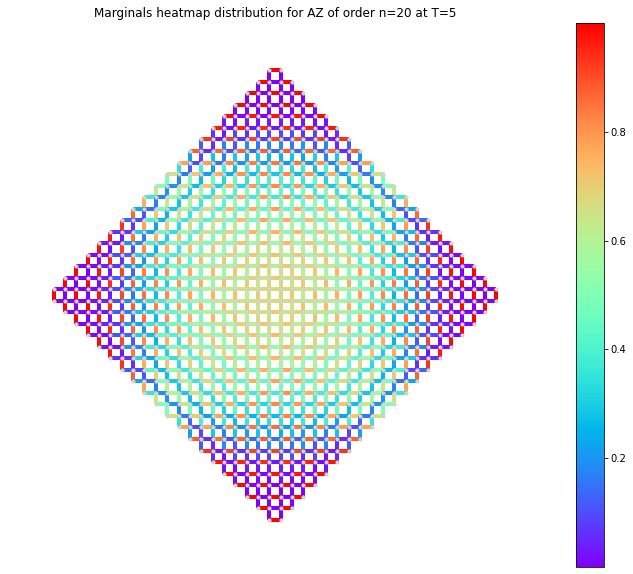

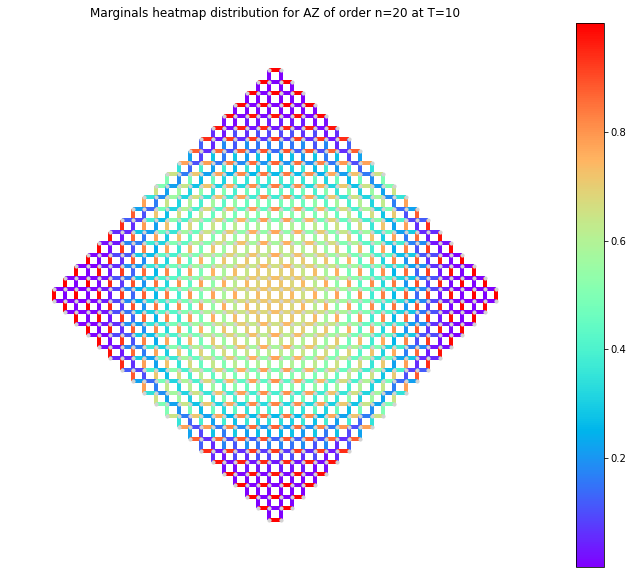

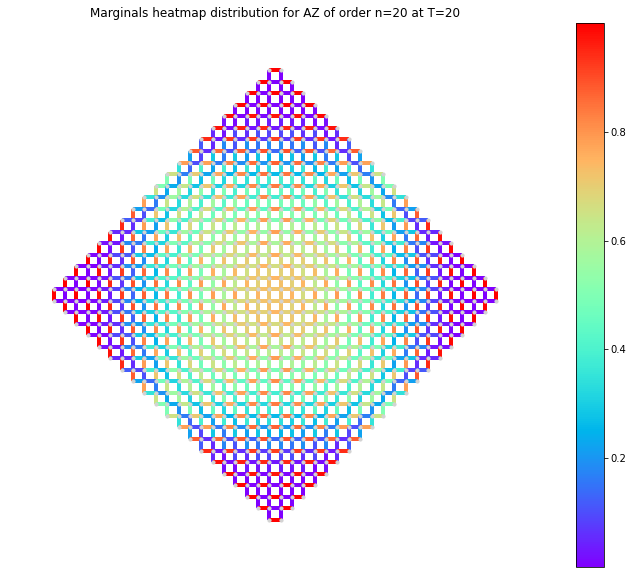

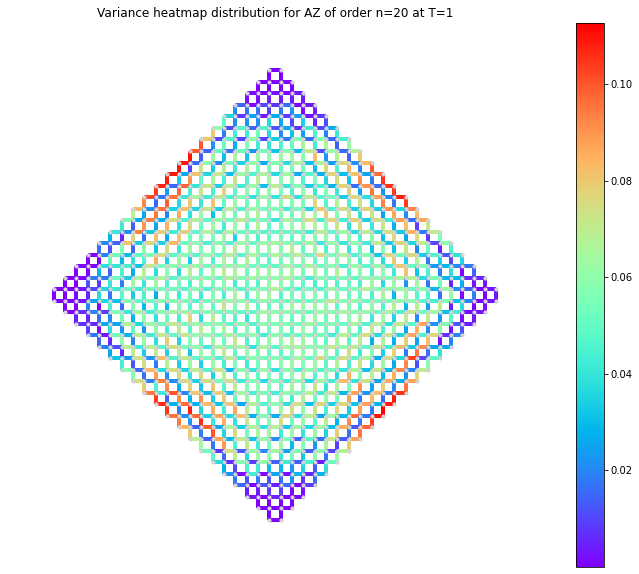

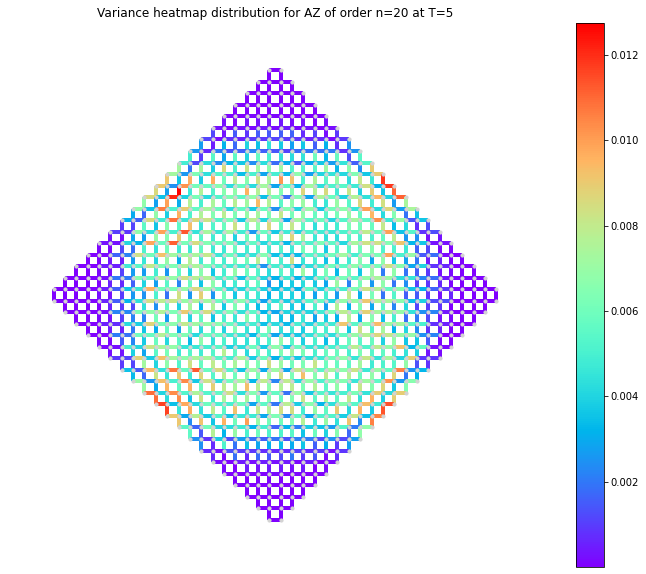

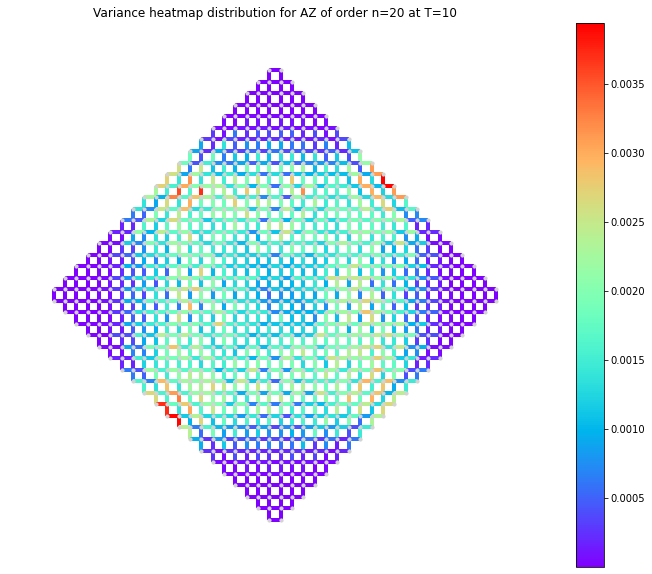

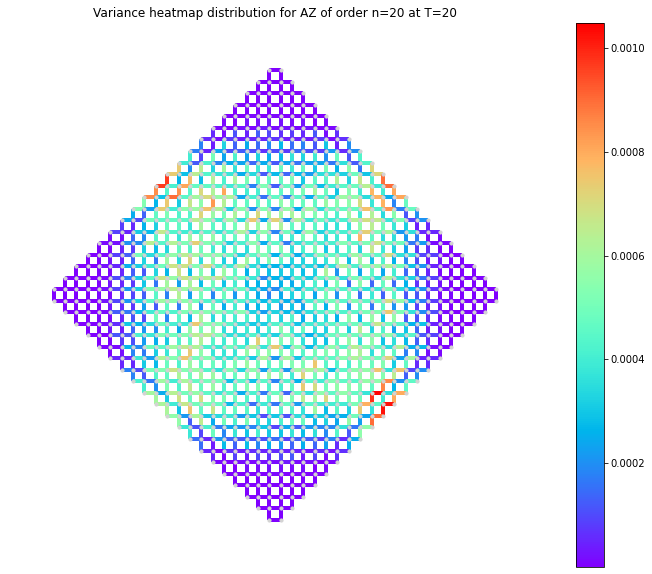

In [ ]:
A, _, _, _ = aztec_graph(20, False)

# Marginals
plot_heatmap(A,20,listmar00,0, False)
plot_heatmap(A,20,listmar01,1, False)
plot_heatmap(A,20,listmar05,5, False)
plot_heatmap(A,20,listmar10,10, False)
plot_heatmap(A,20,listmar20,20, False)

# Variance
plot_heatmap(A,20,varmar00,0, True)
plot_heatmap(A,20,varmar01,1, True)
plot_heatmap(A,20,varmar05,5, True)
plot_heatmap(A,20,varmar10,10, True)
plot_heatmap(A,20,varmar20,20, True)

# Aztec diamond n=10

In [ ]:
n = 10
it = 100
file_marginals_10="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_{}_it_{}.txt".format(n,it)
file_bethe_10="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_{}_it_{}.txt".format(n,it)

f_mar = open(file_marginals_10, 'r')
f_bethe = open(file_bethe_10, 'r')
# print(f_mar)
data_10 = np.loadtxt(f_mar, str)
print(np.shape(data_10))
bethe_10 = np.loadtxt(f_bethe, str)
bethe_list_10 = np.array(bethe_10[1:,:], dtype=float)
print(bethe_list_10)

# T = 0
listmar00 = np.array(data_10[1:,0], dtype=float) # 0th column
print(np.shape(listmar00))
varmar00 = np.array(data_10[1:,1], dtype=float)

# T = 1
listmar01 = np.array(data_10[1:,2], dtype=float)
varmar01 = np.array(data_10[1:,3], dtype=float)

# T = 5
listmar05 = np.array(data_10[1:,4], dtype=float)
varmar05 = np.array(data_10[1:,5], dtype=float)

# T = 10
listmar10 = np.array(data_10[1:,6], dtype=float)
varmar10 = np.array(data_10[1:,7], dtype=float)

# T = 20
listmar20 = np.array(data_10[1:,8], dtype=float)
varmar20 = np.array(data_10[1:,9], dtype=float)

(401, 10)
[[ 0.61605299  1.41309968  6.80403557 13.18642011 25.68637412]]
(400,)


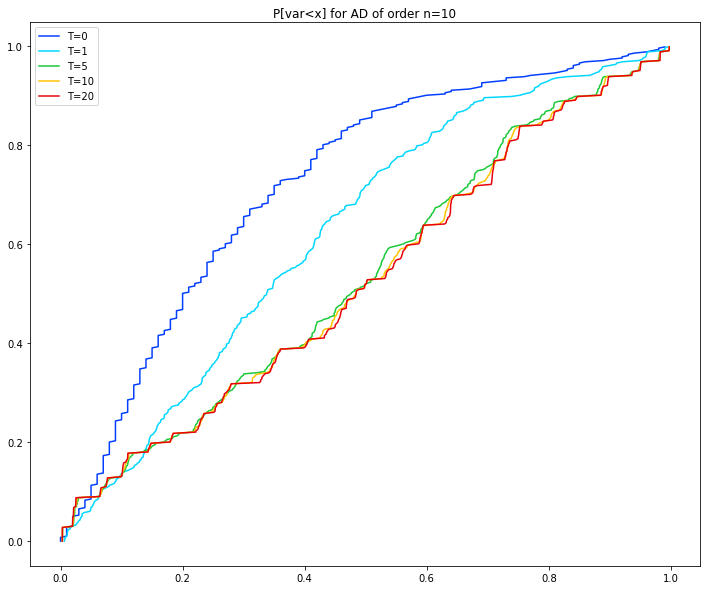

In [ ]:
list00=np.sort(listmar00)
list01=np.sort(listmar01)
list05=np.sort(listmar05)
list10=np.sort(listmar10)
list20=np.sort(listmar20)
size = np.shape(list00)[0]
figsize=(12,10)
fig = plt.figure(1, figsize)
ax = fig.add_subplot(1,1,1)
ax.set_title('P[var<x] for AD of order n={}'.format(n))
ax.plot(list00, np.arange(size)/size,label='T=0', color=sns.color_palette("bright", 10)[0])
ax.plot(list01, np.arange(size)/size,label='T=1', color=sns.color_palette("bright", 10)[9])
ax.plot(list05, np.arange(size)/size,label='T=5', color=sns.color_palette("bright", 10)[2])
ax.plot(list10, np.arange(size)/size,label='T=10', color=sns.color_palette("bright", 10)[8])
ax.plot(list20, np.arange(size)/size,label='T=20', color=sns.color_palette("bright", 10)[3])
ax.legend()


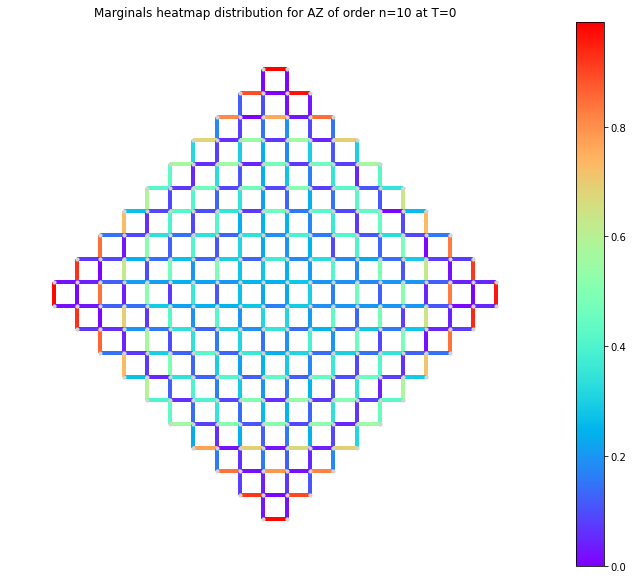

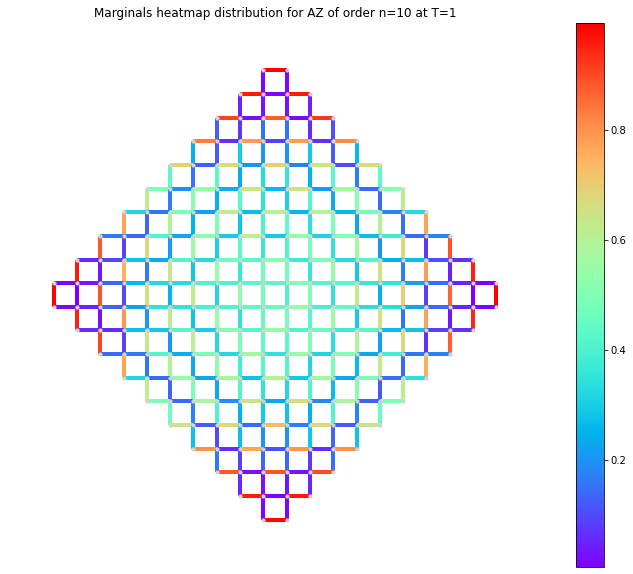

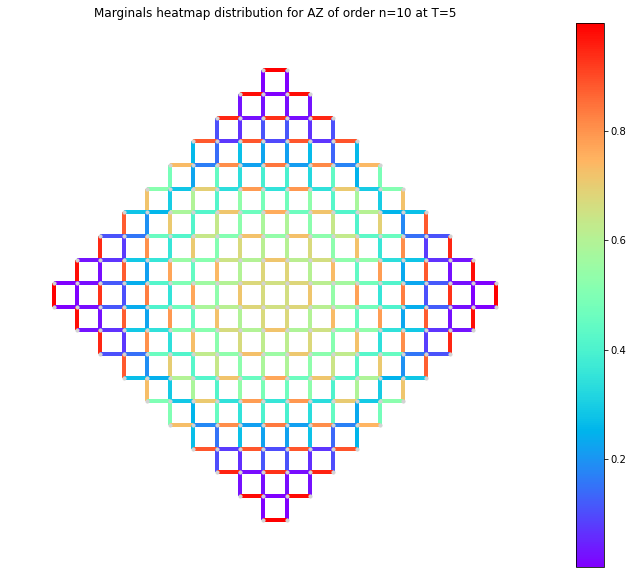

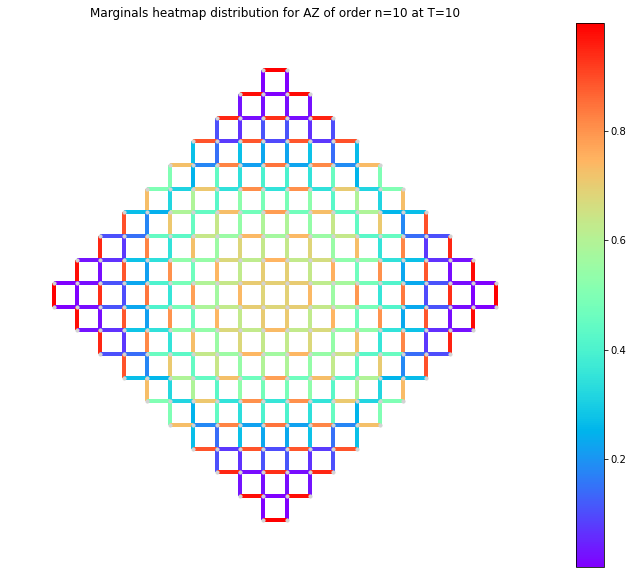

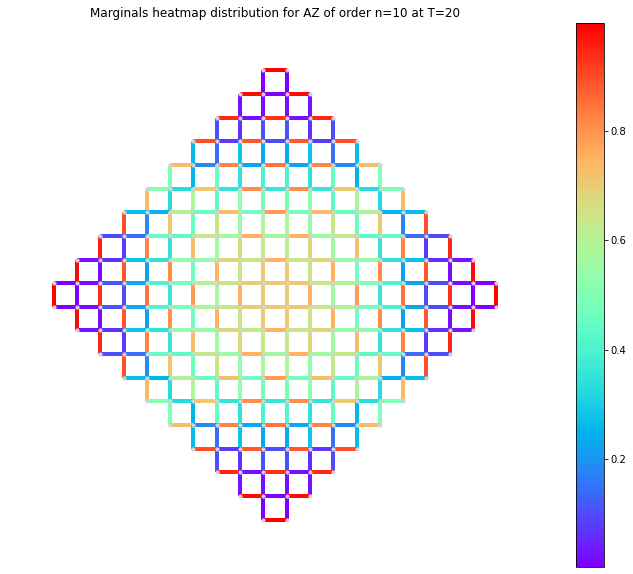

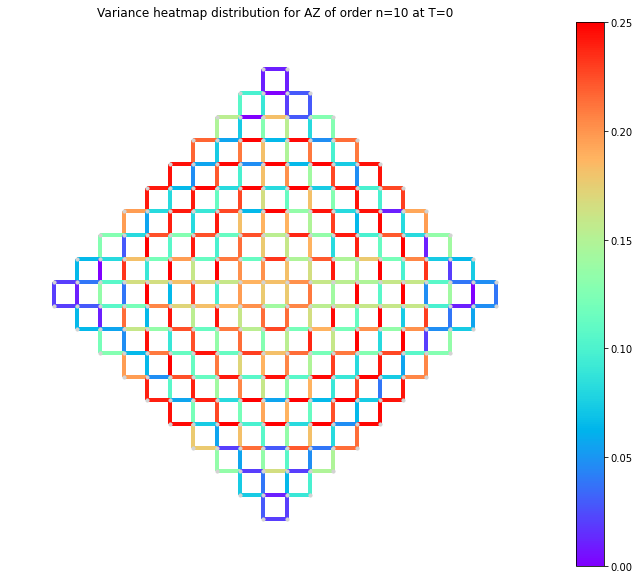

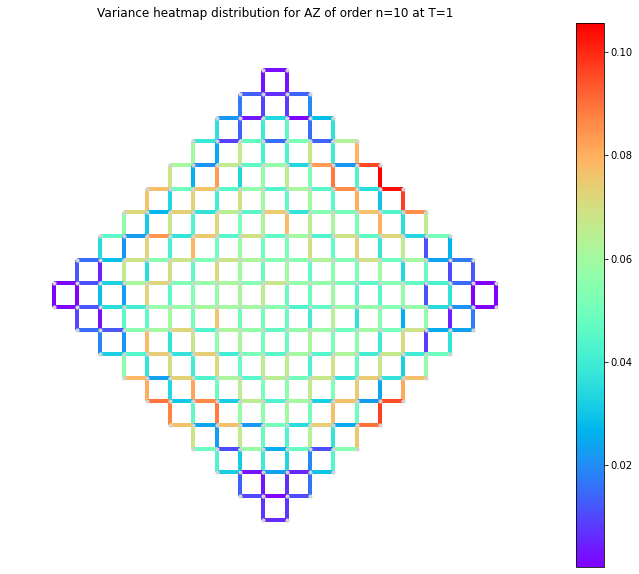

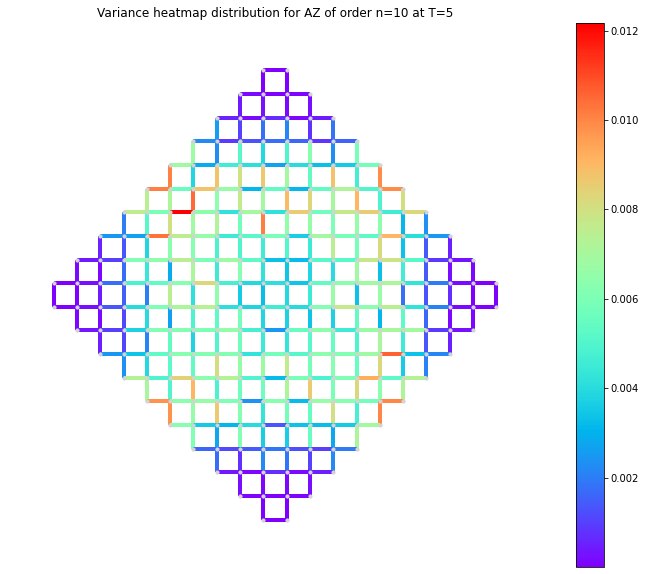

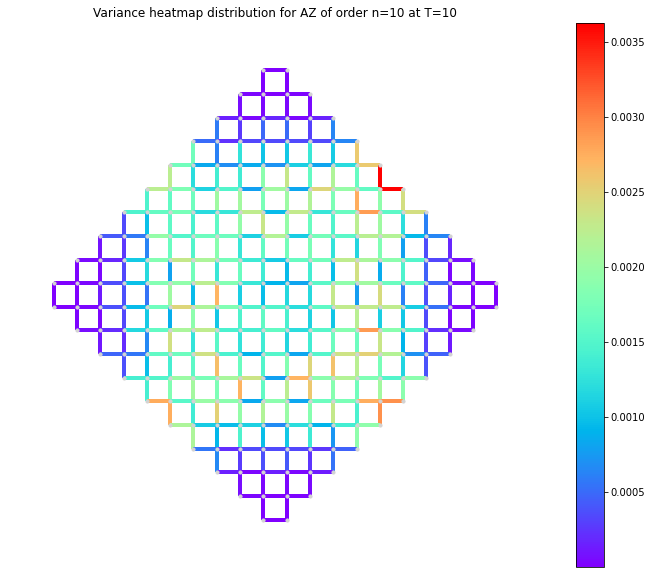

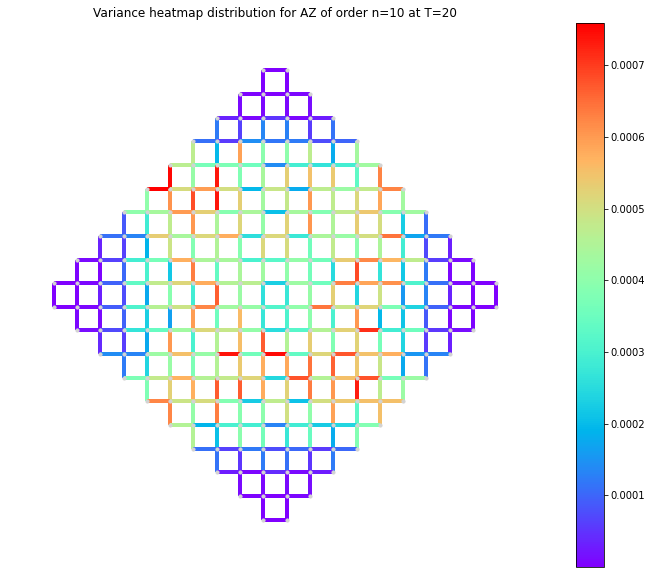

In [ ]:
A, _, _, _ = aztec_graph(10, False)

# Marginals
plot_heatmap(A,10,listmar00,0, False)
plot_heatmap(A,10,listmar01,1, False)
plot_heatmap(A,10,listmar05,5, False)
plot_heatmap(A,10,listmar10,10, False)
plot_heatmap(A,10,listmar20,20, False)

# Variance
plot_heatmap(A,10,varmar00,0, True)
plot_heatmap(A,10,varmar01,1, True)
plot_heatmap(A,10,varmar05,5, True)
plot_heatmap(A,10,varmar10,10, True)
plot_heatmap(A,10,varmar20,20, True)



# Aztec diamond n = 7

In [ ]:
n = 7
it = 100
file_marginals_7="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_{}_it_{}.txt".format(n,it)
file_bethe_7="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_{}_it_{}.txt".format(n,it)

f_mar = open(file_marginals_7, 'r')
f_bethe = open(file_bethe_7, 'r')
# print(f_mar)
data_7 = np.loadtxt(f_mar, str)
print(np.shape(data_7))
bethe_7 = np.loadtxt(f_bethe, str)
bethe_list_7 = np.array(bethe_7[1:,:], dtype=float)
print(bethe_list_7)

# T = 0
listmar00 = np.array(data_7[1:,0], dtype=float) # 0th column
print(np.shape(listmar00))
varmar00 = np.array(data_7[1:,1], dtype=float)

# T = 1
listmar01 = np.array(data_7[1:,2], dtype=float)
varmar01 = np.array(data_7[1:,3], dtype=float)

# T = 5
listmar05 = np.array(data_7[1:,4], dtype=float)
varmar05 = np.array(data_7[1:,5], dtype=float)

# T = 10
listmar10 = np.array(data_7[1:,6], dtype=float)
varmar10 = np.array(data_7[1:,7], dtype=float)

# T = 20
listmar20 = np.array(data_7[1:,8], dtype=float)
varmar20 = np.array(data_7[1:,9], dtype=float)

(197, 10)
[[ 0.6058092   1.34096278  6.53020267 12.59135288 24.55518689]]
(196,)


# Aztec diamond n = 5

In [ ]:
n = 5
it = 100
file_marginals_5="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_{}_it_{}.txt".format(n,it)
file_bethe_5="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_{}_it_{}.txt".format(n,it)

f_mar = open(file_marginals_5, 'r')
f_bethe = open(file_bethe_5, 'r')
# print(f_mar)
data_5 = np.loadtxt(f_mar, str)
print(np.shape(data_5))
bethe_5 = np.loadtxt(f_bethe, str)
bethe_list_5 = np.array(bethe_5[1:,:], dtype=float)
print(bethe_list_5)

# T = 0
listmar00 = np.array(data_5[1:,0], dtype=float) # 0th column
print(np.shape(listmar00))
varmar00 = np.array(data_5[1:,1], dtype=float)

# T = 1
listmar01 = np.array(data_5[1:,2], dtype=float)
varmar01 = np.array(data_5[1:,3], dtype=float)

# T = 5
listmar05 = np.array(data_5[1:,4], dtype=float)
varmar05 = np.array(data_5[1:,5], dtype=float)

# T = 10
listmar10 = np.array(data_5[1:,6], dtype=float)
varmar10 = np.array(data_5[1:,7], dtype=float)

# T = 20
listmar20 = np.array(data_5[1:,8], dtype=float)
varmar20 = np.array(data_5[1:,9], dtype=float)

(101, 10)
[[ 0.59051617  1.29382204  6.0956219  11.71890264 22.64319926]]
(100,)


# T plots and Bethe energy plots

In [ ]:
# Consistency check

file_marginals_5="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_5_it_100.txt"
file_bethe_5="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_5_it_100.txt"
f_mar_5 = open(file_marginals_5, 'r')
f_bethe_5 = open(file_bethe_5, 'r')
data_5 = np.loadtxt(f_mar_5, str)
bethe_5 = np.loadtxt(f_bethe_5, str)

file_marginals_7="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_7_it_100.txt"
file_bethe_7="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_7_it_100.txt"
f_mar_7 = open(file_marginals_7, 'r')
f_bethe_7 = open(file_bethe_7, 'r')
data_7 = np.loadtxt(f_mar_7, str)
bethe_7 = np.loadtxt(f_bethe_7, str)

file_marginals_10="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_10_it_100.txt"
file_bethe_10="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_10_it_100.txt"
f_mar_10 = open(file_marginals_10, 'r')
f_bethe_10 = open(file_bethe_10, 'r')
data_10 = np.loadtxt(f_mar_10, str)
bethe_10 = np.loadtxt(f_bethe_10, str)

file_marginals_20="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_20_it_100.txt"
file_bethe_20="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_20_it_100.txt"
f_mar_20 = open(file_marginals_20, 'r')
f_bethe_20 = open(file_bethe_20, 'r')
data_20 = np.loadtxt(f_mar_20, str)
bethe_20 = np.loadtxt(f_bethe_20, str)

file_marginals_40="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_40_it_100.txt"
file_bethe_40="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_40_it_100.txt"
f_mar_40 = open(file_marginals_40, 'r')
f_bethe_40 = open(file_bethe_40, 'r')
data_40 = np.loadtxt(f_mar_40, str)
bethe_40 = np.loadtxt(f_bethe_40, str)

file_marginals_50="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_50_it_10.txt"
file_bethe_50="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_50_it_10.txt"
f_mar_50 = open(file_marginals_50, 'r')
f_bethe_50 = open(file_bethe_50, 'r')
data_50 = np.loadtxt(f_mar_50, str)
bethe_50 = np.loadtxt(f_bethe_50, str)

file_marginals_100="/content/drive/MyDrive/Colab Notebooks/Marginals_Aztec_n_100_it_10.txt"
file_bethe_100="/content/drive/MyDrive/Colab Notebooks/Bethe_Aztec_n_100_it_10.txt"
f_mar_100 = open(file_marginals_100, 'r')
f_bethe_100 = open(file_bethe_100, 'r')
data_100 = np.loadtxt(f_mar_100, str)
bethe_100 = np.loadtxt(f_bethe_100, str)

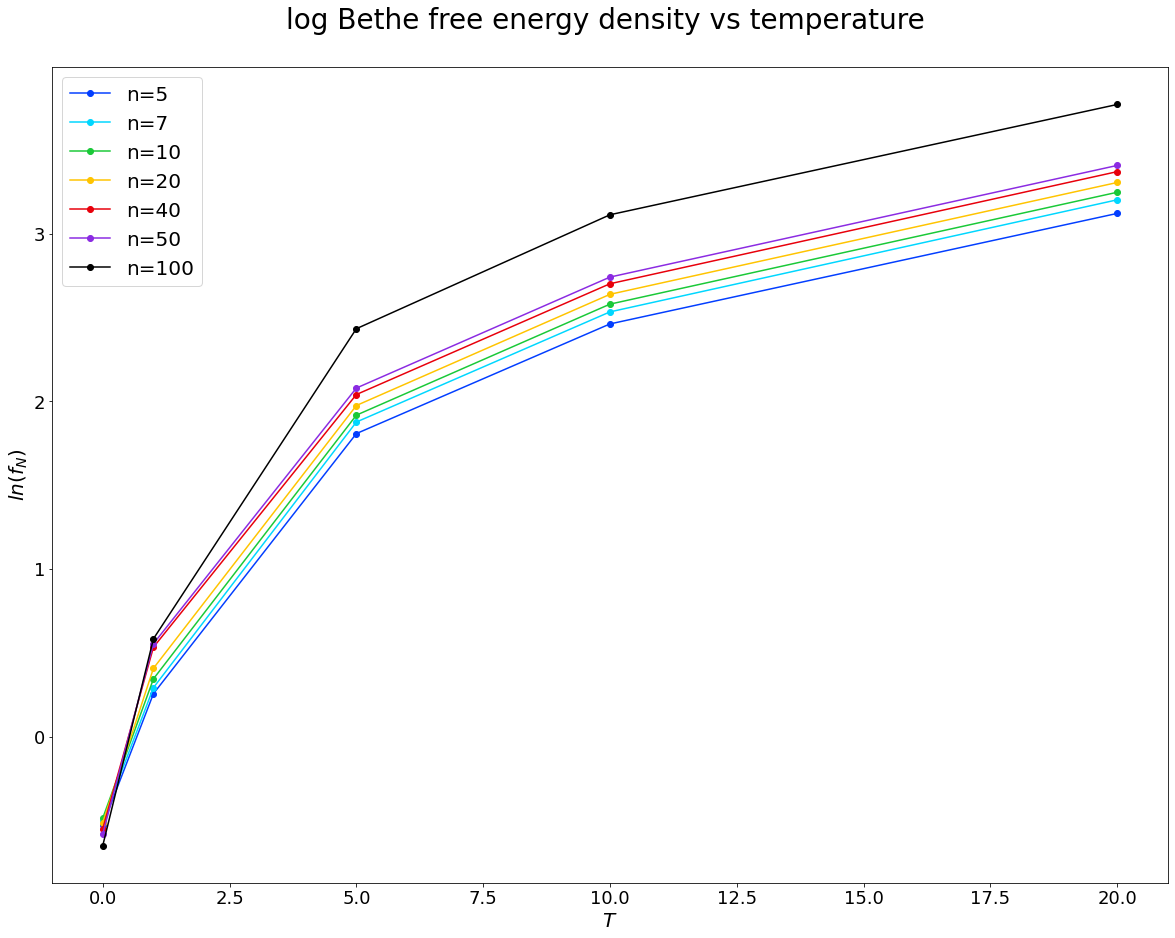

In [ ]:
# error = np.var(bethe)/np.sqrt(realisations)
bethe_list_5 = np.array(bethe_5[1:,:], dtype=float)
bethe_list_5 = bethe_list_5.flatten()
# print(np.shape(bethe_list_5))
bethe_list_7 = np.array(bethe_7[1:,:], dtype=float)
bethe_list_7 = bethe_list_7.flatten()
# print(np.shape(bethe_list_7))
bethe_list_10 = np.array(bethe_10[1:,:], dtype=float)
bethe_list_10 = bethe_list_10.flatten()
# print(np.shape(bethe_list_10))
bethe_list_20 = np.array(bethe_20[1:,:], dtype=float)
bethe_list_20 = bethe_list_20.flatten()
# print(np.shape(bethe_list_20))
bethe_list_40 = np.array(bethe_40[1:,:], dtype=float)
bethe_list_40 = bethe_list_40.flatten()
# print(np.shape(bethe_list_40))
bethe_list_50 = np.array(bethe_50[1:,:], dtype=float)
bethe_list_50 = bethe_list_50.flatten()

bethe_list_100 = np.array(bethe_100[1:,:], dtype=float)
bethe_list_100 = bethe_list_100.flatten()
# print(np.shape(bethe_list_40))
list_T = np.array([0, 1, 5, 10, 20])

figsize=(20,15)
fig = plt.figure(1, figsize)
ax = fig.add_subplot(1,1,1)
ax.set_title('log Bethe free energy density vs temperature \n', fontsize=28)
ax.set_xlabel('$T$', fontsize=20)
ax.set_ylabel('$ln(f_N)$', fontsize=20)
plt.xticks(size=18)
plt.yticks(size=18)
ax.plot(list_T, np.log(bethe_list_5),label='n=5', color=sns.color_palette("bright", 10)[0], marker='o')
ax.plot(list_T, np.log(bethe_list_7),label='n=7', color=sns.color_palette("bright", 10)[9], marker='o')
ax.plot(list_T, np.log(bethe_list_10),label='n=10', color=sns.color_palette("bright", 10)[2],  marker='o')
ax.plot(list_T, np.log(bethe_list_20),label='n=20', color=sns.color_palette("bright", 10)[8], marker='o')
ax.plot(list_T, np.log(bethe_list_40),label='n=40', color=sns.color_palette("bright", 10)[3],  marker='o')
ax.plot(list_T, np.log(bethe_list_50),label='n=50', color=sns.color_palette("bright", 10)[4],  marker='o')
ax.plot(list_T, np.log(bethe_list_100),label='n=100', color='k',  marker='o')
ax.legend(fontsize=20)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


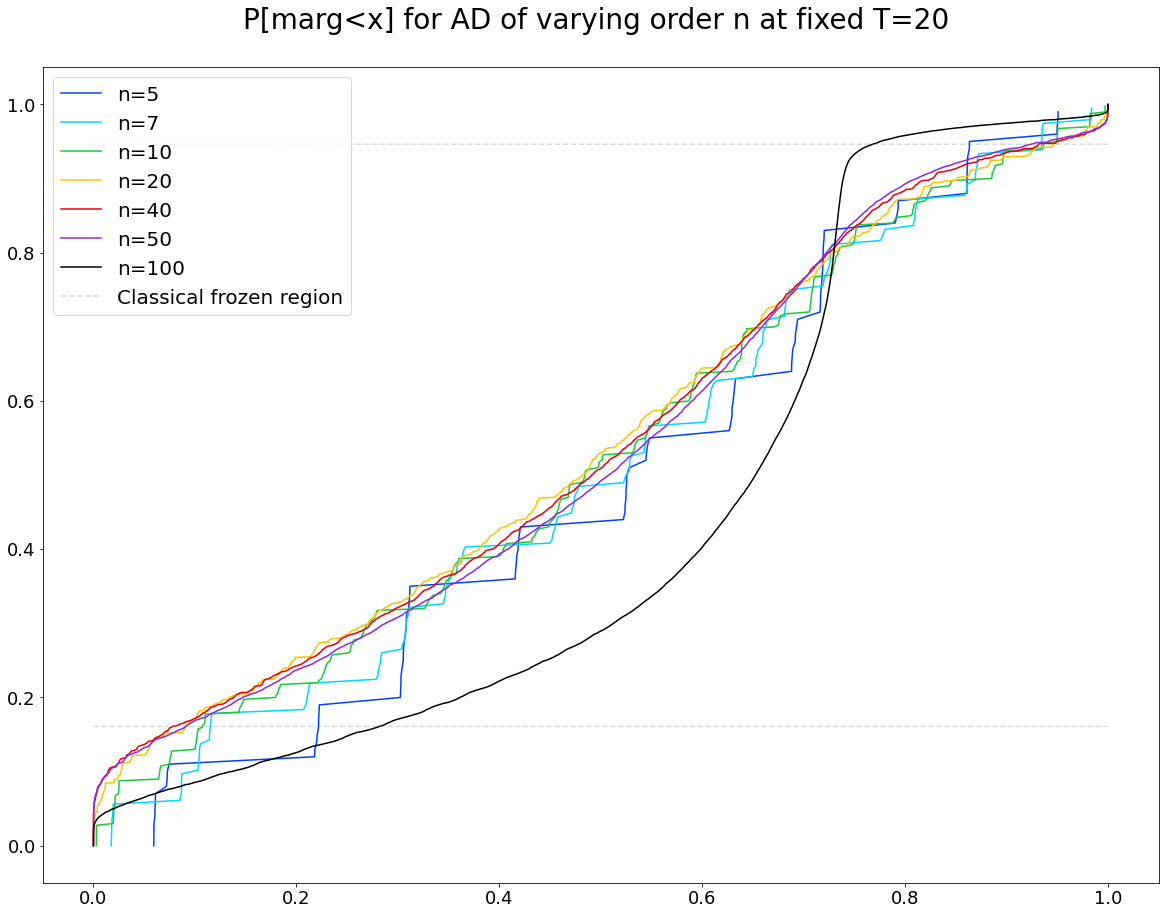

In [ ]:
# # T = 20
listmar20_5 = np.sort(np.array(data_5[1:,8], dtype=float))
listmar20_7 = np.sort(np.array(data_7[1:,8], dtype=float))
listmar20_10 = np.sort(np.array(data_10[1:,8], dtype=float))
listmar20_20 = np.sort(np.array(data_20[1:,8], dtype=float))
listmar20_40 = np.sort(np.array(data_40[1:,8], dtype=float))
listmar20_50 = np.sort(np.array(data_50[1:,8], dtype=float))
listmar20_100 = np.sort(np.array(data_100[1:,8], dtype=float))

size_5 = np.shape(listmar20_5)[0]
size_7 = np.shape(listmar20_7)[0]
size_10 = np.shape(listmar20_10)[0]
size_20 = np.shape(listmar20_20)[0]
size_40 = np.shape(listmar20_40)[0]
size_50 = np.shape(listmar20_50)[0]
size_100 = np.shape(listmar20_100)[0]

figsize=(20,15)
fig = plt.figure(1, figsize)
ax = fig.add_subplot(1,1,1)
ax.set_title('P[marg<x] for AD of varying order n at fixed T=20 \n', fontsize=28)
plt.xticks(size=18)
plt.yticks(size=18)
ax.plot(listmar20_5, np.arange(size_5)/size_5,label='n=5', color=sns.color_palette("bright", 10)[0])
ax.plot(listmar20_7, np.arange(size_7)/size_7,label='n=7', color=sns.color_palette("bright", 10)[9])
ax.plot(listmar20_10, np.arange(size_10)/size_10,label='n=10', color=sns.color_palette("bright", 10)[2])
ax.plot(listmar20_20, np.arange(size_20)/size_20,label='n=20', color=sns.color_palette("bright", 10)[8])
ax.plot(listmar20_40, np.arange(size_40)/size_40,label='n=40', color=sns.color_palette("bright", 10)[3])
ax.plot(listmar20_50, np.arange(size_50)/size_50,label='n=50', color=sns.color_palette("bright", 10)[4])
ax.plot(listmar20_100, np.arange(size_100)/size_100,label='n=100', color='k')
ax.plot(np.arange(0,1, 0.0001), np.ones(np.size(np.arange(0,1,0.0001)))*(1-np.pi/4)*(3/4), label='Classical frozen region', color='grey', linestyle='--', alpha=0.3)
ax.plot(np.arange(0,1, 0.0001), np.ones(np.size(np.arange(0,1,0.0001)))*(1-(1-np.pi/4)*(1/4)), color='grey', linestyle='--', alpha=0.3)
ax.legend(fontsize=20, loc='upper left')